# **LIMPIEZA DE DATOS**

In [1]:
%matplotlib notebook
%matplotlib inline

CARGA DE LIBRERIAS

In [2]:
import pandas as pd
import numpy as np
import os
import missingno as msno 
import matplotlib.pyplot as plt
import seaborn as sns

CARGA DE FICHEROS

In [3]:
CARPETA_DATOS_ORIGINALES = 'Datos/Originales/'
df_sabi_1= pd.read_excel(os.path.join(CARPETA_DATOS_ORIGINALES, 'df_sabi_modif_1.xlsx'))
df_sabi_2= pd.read_excel(os.path.join(CARPETA_DATOS_ORIGINALES, 'df_sabi_modif_2_new.xlsx'))
df_dealroom= pd.read_excel(os.path.join(CARPETA_DATOS_ORIGINALES, 'df_dealroom_modif.xlsx'))
df_sabi_3= pd.read_excel(os.path.join(CARPETA_DATOS_ORIGINALES, 'df_sabi_parte3.xlsx'))

c:\Users\ikerm\.conda\envs\reto06\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


VISUALIZACIi“N DE FICHEROS

In [4]:
df_sabi_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Codigo_NIF                  412 non-null    object 
 1   Nombre_sabi                 412 non-null    object 
 2   Localidad                   412 non-null    object 
 3   Fecha constitucion          412 non-null    object 
 4   Codigo consolidacion        412 non-null    object 
 5   Codigo primario CNAE 2009   412 non-null    int64  
 6   Forma juridica              412 non-null    object 
 7   Forma juridica detallada    412 non-null    object 
 8   Estado                      412 non-null    object 
 9   Estado detallado            412 non-null    object 
 10  Capital social mil EUR      412 non-null    float64
 11  Free capital mil EUR        412 non-null    float64
 12  Porcentaje_adquisicion_cat  412 non-null    int64  
dtypes: float64(2), int64(2), object(9)


In [5]:
df_sabi_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 51 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Codigo_NIF                                                  824 non-null    object 
 1   year                                                        824 non-null    int64  
 2   Acreedores a L. P. mil EUR                                  612 non-null    float64
 3   Acreedores comerciales mil EUR                              565 non-null    float64
 4   Activo circulante mil EUR                                   815 non-null    float64
 5   Apalancamiento (%) %                                        816 non-null    float64
 6   Capital suscrito mil EUR                                    816 non-null    float64
 7   Cash flow mil EUR                                           816 non-null    float64
 8   

In [6]:
df_dealroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Codigo_NIF            412 non-null    object 
 1   name_dealroom         412 non-null    object 
 2   profile_url           412 non-null    object 
 3   website               412 non-null    object 
 4   tagline               356 non-null    object 
 5   total_funding         381 non-null    float64
 6   first_funding_date    364 non-null    object 
 7   last_funding_date     364 non-null    object 
 8   last_funding          196 non-null    float64
 9   last_round            342 non-null    object 
 10  total_rounds          412 non-null    int64  
 11  n_empleados_dealroom  107 non-null    float64
 12  ownerships            345 non-null    object 
 13  b2b_b2c               397 non-null    object 
 14  revenue_models        228 non-null    object 
 15  growth_stage          4

In [7]:
print(df_sabi_1.isna().sum())
print(df_sabi_1.shape)

Codigo_NIF                    0
Nombre_sabi                   0
Localidad                     0
Fecha constitucion            0
Codigo consolidacion          0
Codigo primario CNAE 2009     0
Forma juridica                0
Forma juridica detallada      0
Estado                        0
Estado detallado              0
Capital social mil EUR        0
Free capital mil EUR          0
Porcentaje_adquisicion_cat    0
dtype: int64
(412, 13)


In [8]:
df_sabi_2.columns

Index(['Codigo_NIF', 'year', 'Acreedores a L. P. mil EUR',
       'Acreedores comerciales mil EUR', 'Activo circulante mil EUR',
       'Apalancamiento (%) %', 'Capital suscrito mil EUR', 'Cash flow mil EUR',
       'Deudas financieras mil EUR', 'EBITDA mil EUR', 'Endeudamiento (%) %',
       'Existencias mil EUR', 'Fondo de maniobra mil EUR',
       'Fondos propios mil EUR', 'Gastos financieros mil EUR',
       'Importe neto Cifra de Ventas mil EUR',
       'Ingresos de explotación mil EUR', 'Inmovilizado inmaterial mil EUR',
       'Inmovilizado material mil EUR', 'Inmovilizado mil EUR',
       'Margen de beneficio (%) %', 'Número empleados',
       'Otros fondos propios mil EUR', 'Pasivo fijo mil EUR',
       'Pasivo líquido mil EUR', 'Período de cobro (días) días',
       'Ratio de liquidez %', 'Ratio de solvencia %',
       'Rentabilidad económica (%) %', 'Rentabilidad financiera (%) %',
       'Result. ordinarios antes Impuestos mil EUR',
       'Resultado Actividades Ordinarias 

Codigo_NIF                                                      0
year                                                            0
Acreedores a L. P. mil EUR                                    212
Acreedores comerciales mil EUR                                259
Activo circulante mil EUR                                       9
Apalancamiento (%) %                                            8
Capital suscrito mil EUR                                        8
Cash flow mil EUR                                               8
Deudas financieras mil EUR                                    400
EBITDA mil EUR                                                  9
Endeudamiento (%) %                                             8
Existencias mil EUR                                           434
Fondo de maniobra mil EUR                                      11
Fondos propios mil EUR                                          8
Gastos financieros mil EUR                                      8
Importe ne

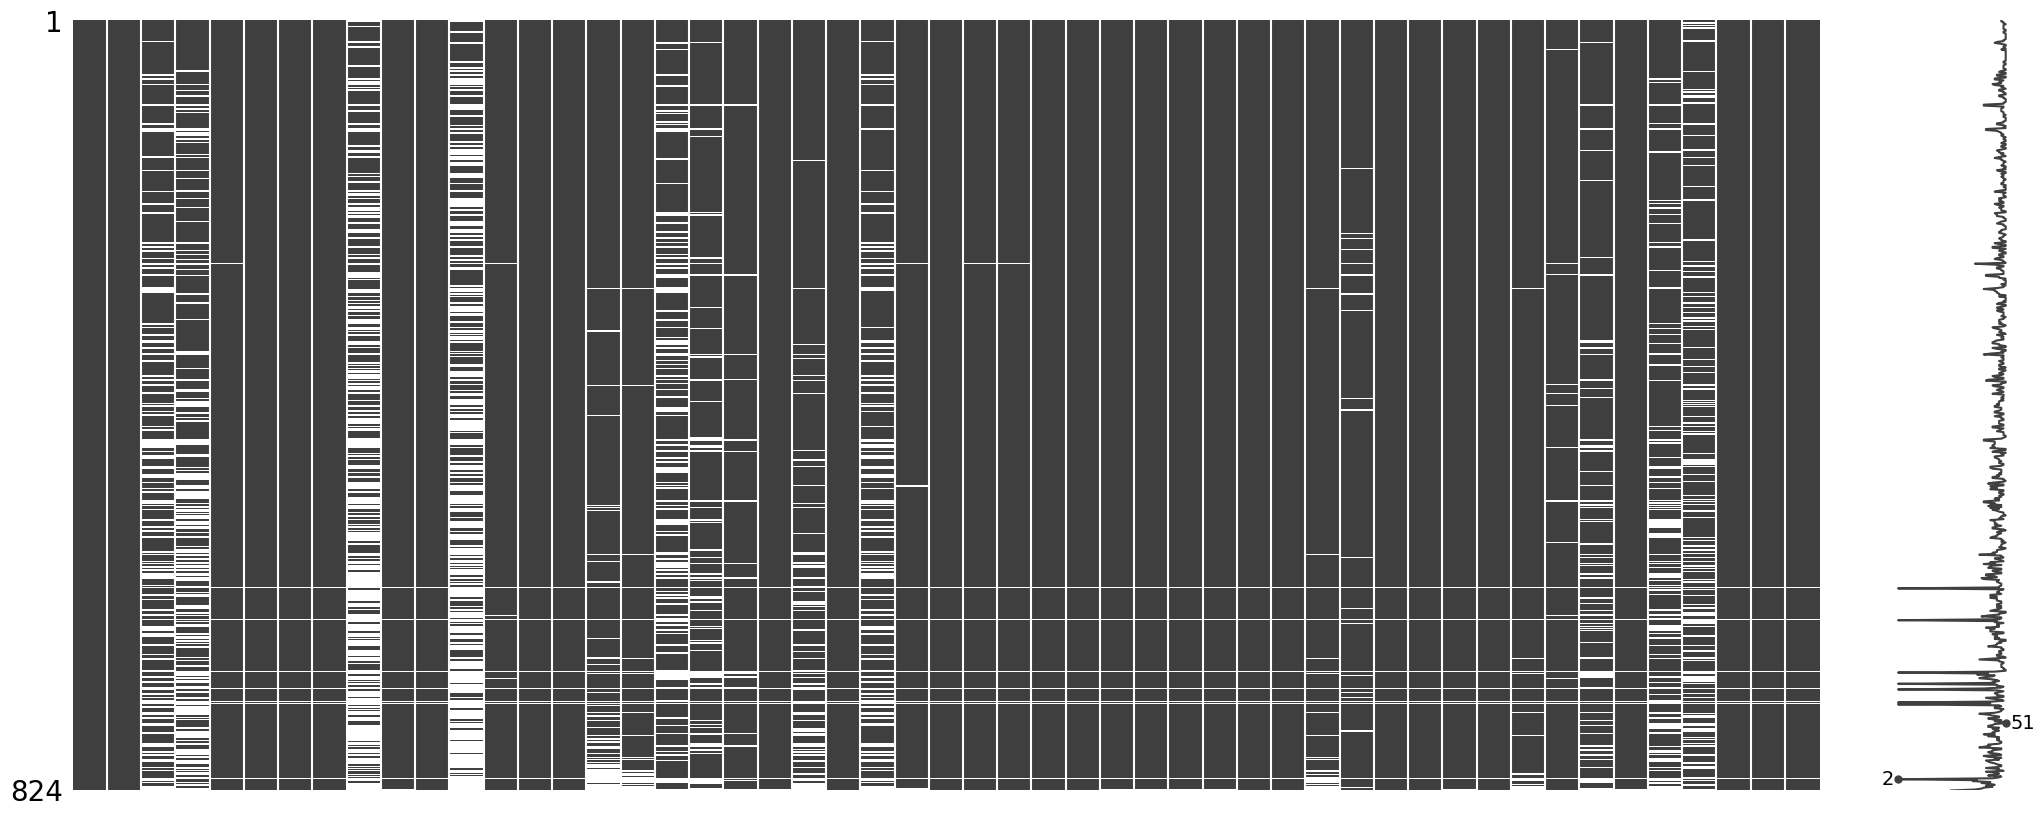

In [9]:
print(df_sabi_2.isna().sum())
print(msno.matrix(df_sabi_2))

Codigo_NIF                                                  0
year                                                        0
Beneficio por empleado mil                                  9
Capital circulante por empleado mil                         8
Consumo de mercaderías y de materias mil EUR              824
Coste medio de los empleados mil                           52
Gastos de personal mil EUR                                 54
Gastos extraordinarios mil EUR                            824
Ingresos de explotación por empleado mil                   24
Ingresos extraordinarios mil EUR                          824
Ingresos financieros mil EUR                                8
Liquidez general %                                          9
Materiales mil EUR                                        148
Otros Conceptos de Explotación mil EUR                     11
Otros activos fijos mil EUR                               153
Otros activos líquidos mil EUR                             21
Otros ga

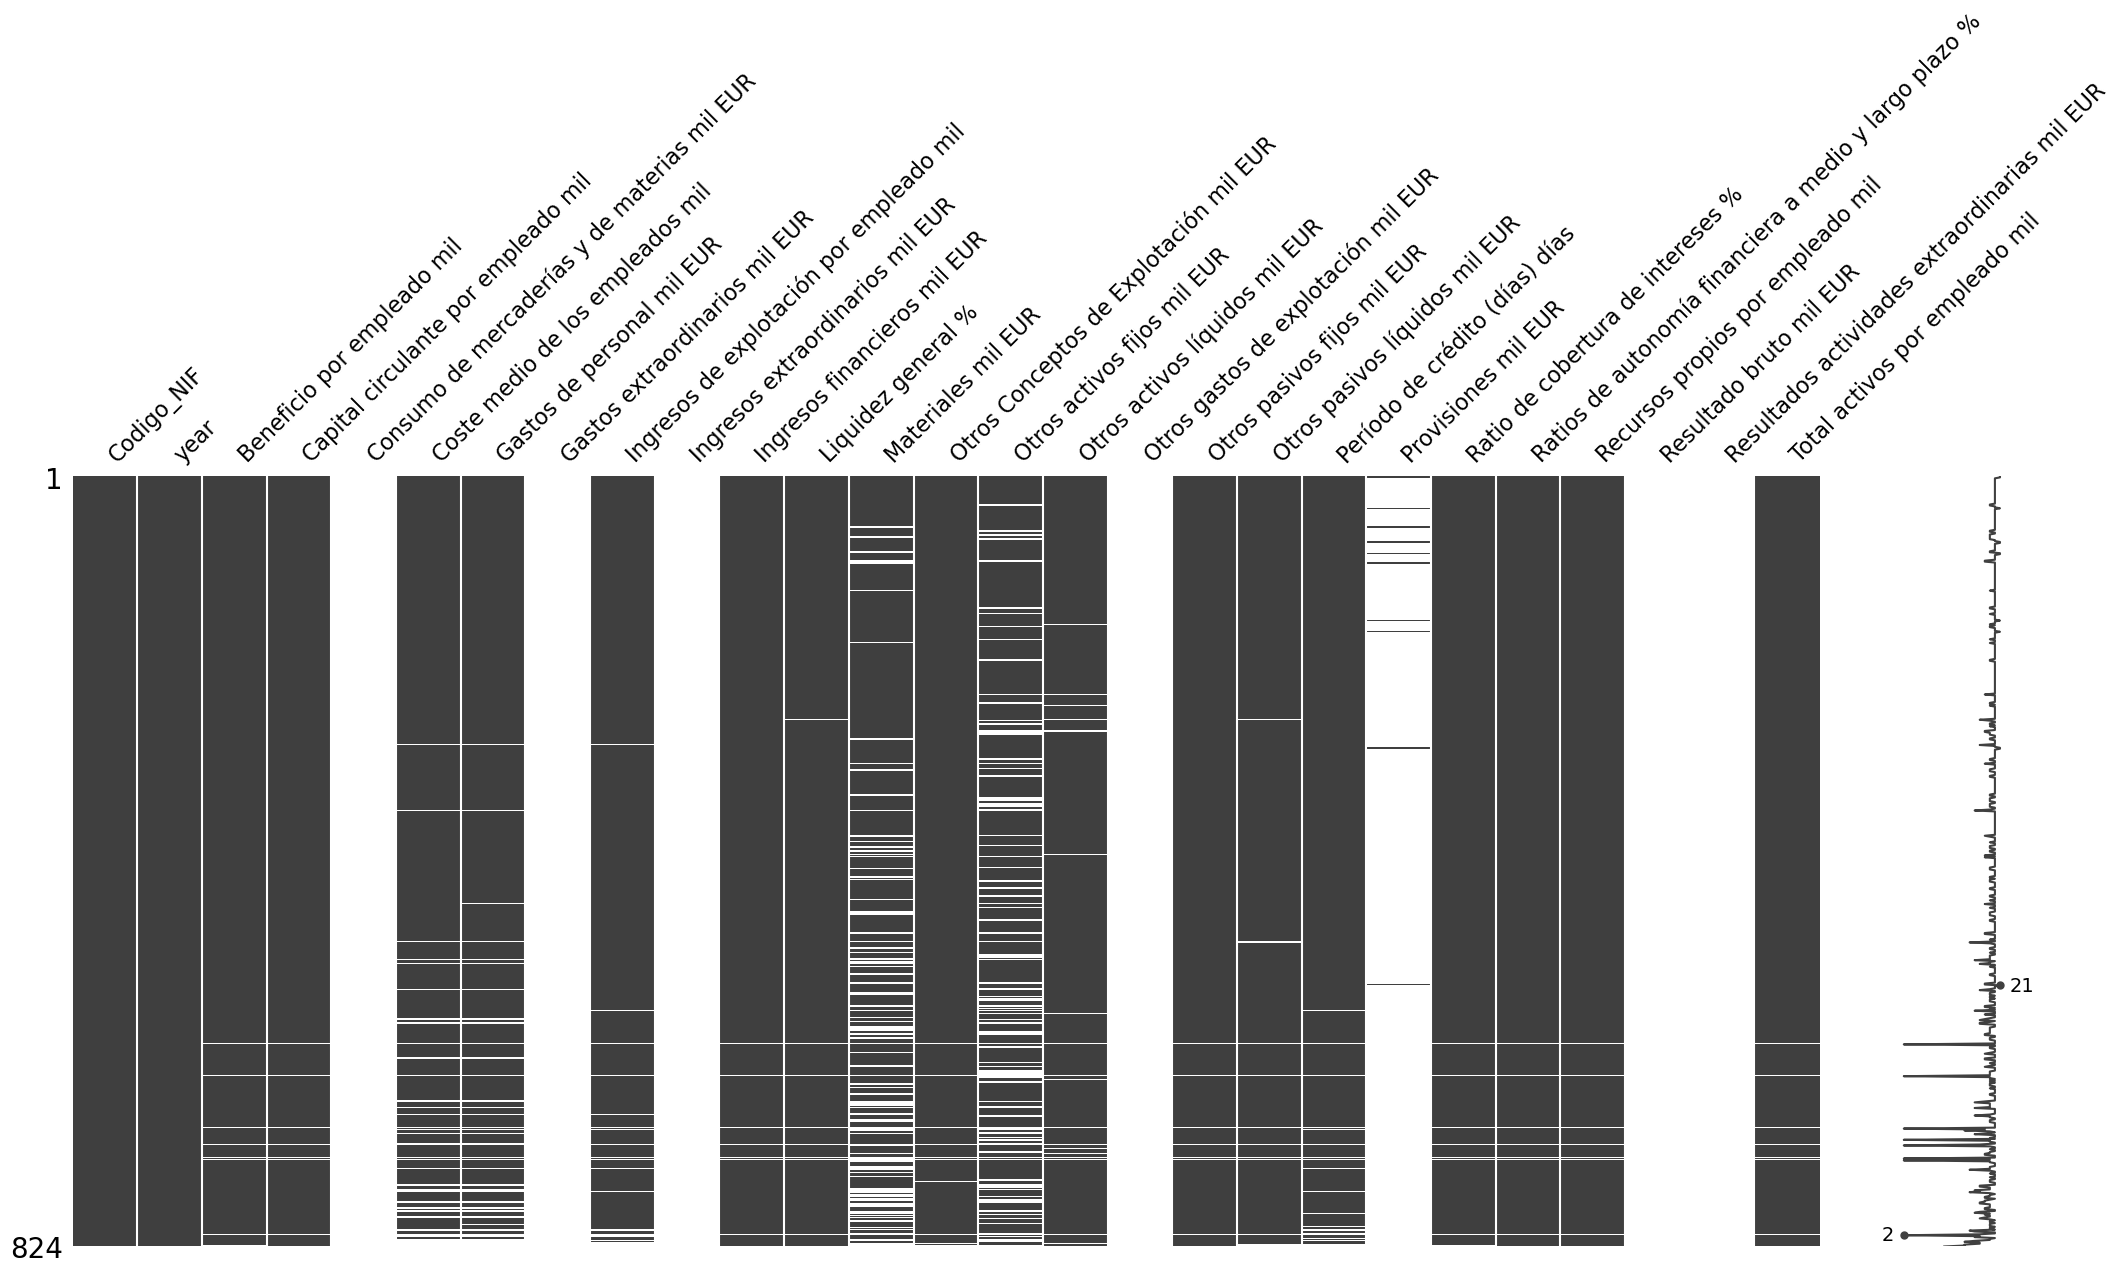

In [10]:
print(df_sabi_3.isna().sum())
print(msno.matrix(df_sabi_3))

CONVERSION DE VALORES Y CREACION DE VARIABLES

###### df_sabi2

In [11]:
# pasamos el n.s. a NaN con applymap
df_sabi_2=df_sabi_2.applymap(lambda x: np.nan if x=='n.s.' else x)
df_sabi_3=df_sabi_3.applymap(lambda x: np.nan if x=='n.s.' else x)

In [12]:
print(df_sabi_2.shape)
# se calcula la cantidad de nulos por fila
# print(df_sabi_2.isna().sum(axis=1)[df_sabi_2.isna().sum(axis=1)>8])
indices_missings= df_sabi_2.isna().sum(axis=1)[df_sabi_2.isna().sum(axis=1)>8].index
print(df_sabi_2.iloc[indices_missings,:])

(824, 51)
    Codigo_NIF  year  Acreedores a L. P. mil EUR  \
90   B75219261  2021                         NaN   
91   B75219261  2020                         NaN   
116  B01518620  2021                         NaN   
117  B01518620  2020                         NaN   
260  B75157081  2021                         NaN   
..         ...   ...                         ...   
818  B01563881  2021                    30.64454   
820  B95626842  2021                         NaN   
821  B95626842  2020                         NaN   
822  B95992509  2021                         NaN   
823  B95992509  2020                         NaN   

     Acreedores comerciales mil EUR  Activo circulante mil EUR  \
90                              NaN                 1532.43809   
91                              NaN                  505.32821   
116                             NaN                 1074.15346   
117                             NaN                 1025.11823   
260                             NaN

In [13]:
# se crea columna con numero de missing por fila
df_sabi_2['n_missings']= df_sabi_2.isna().sum(axis=1)

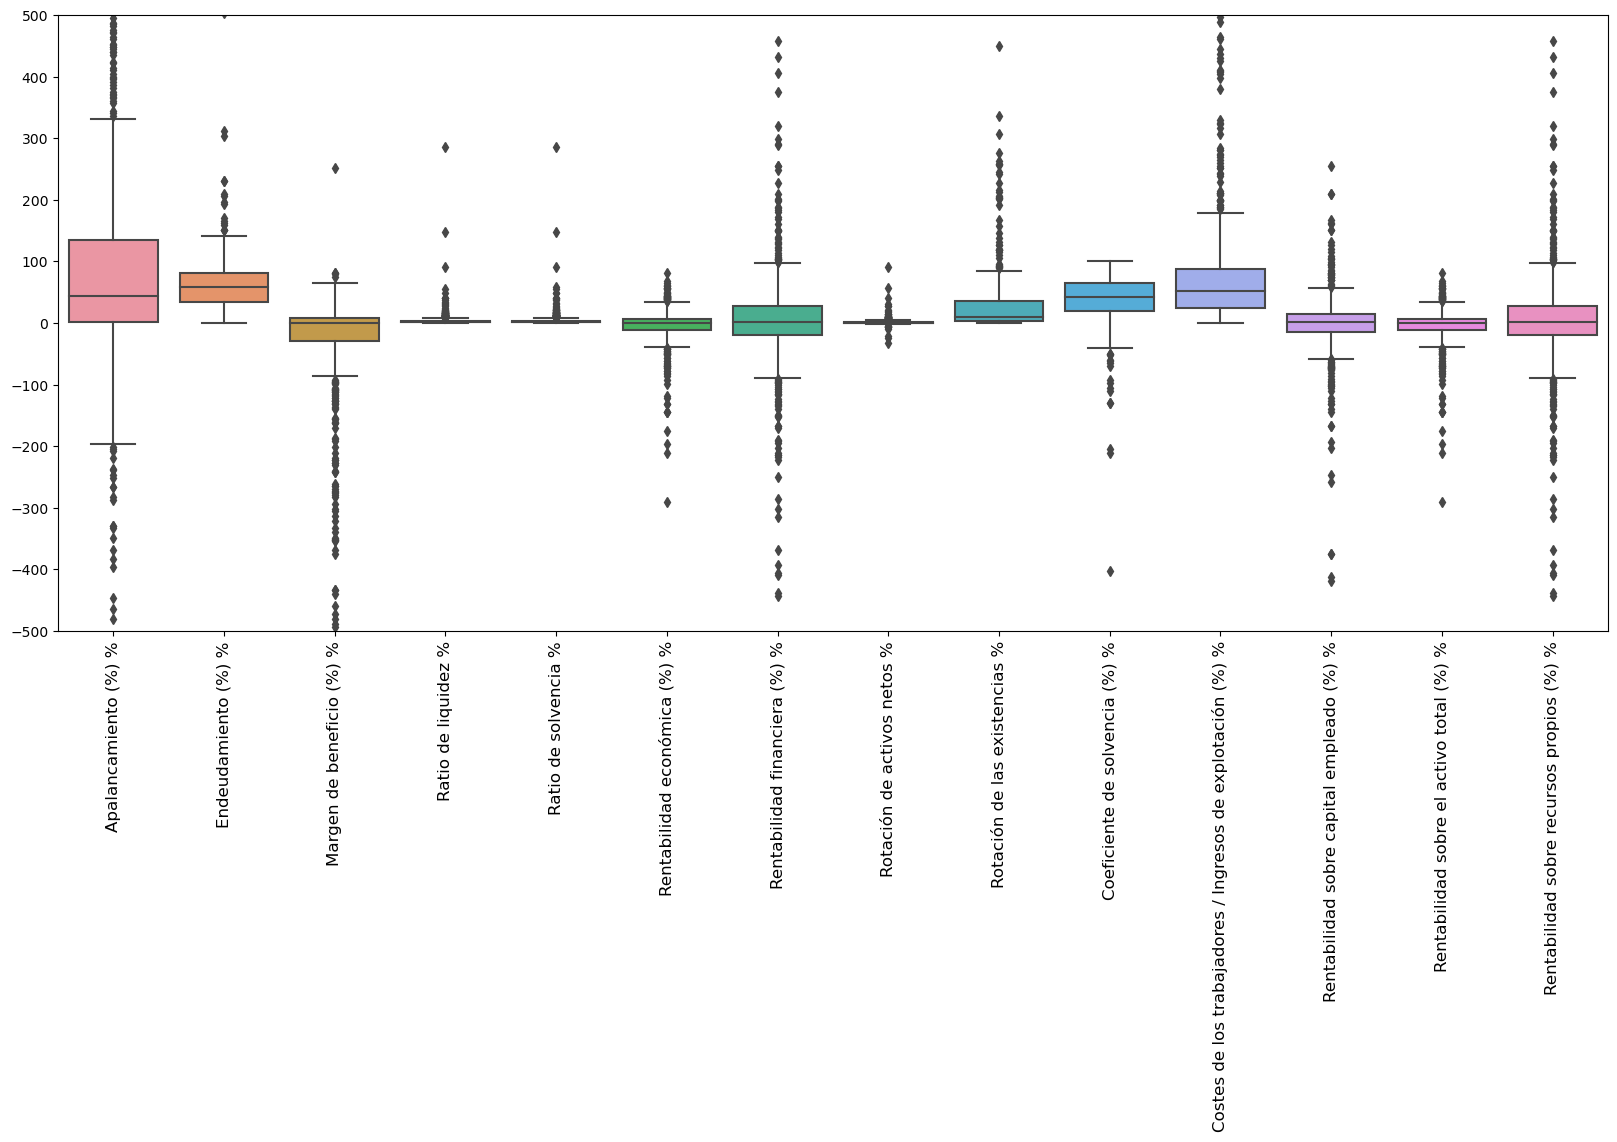

In [14]:
#Se realizan boxplots de las columnas numericas que esti©n mostradas en %.
df_sabi_2_porcentaje = df_sabi_2.loc[:, df_sabi_2.columns.str.contains('%')]
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(data=df_sabi_2_porcentaje, ax=ax)
plt.xticks(rotation=90)
ax.set_ylim(-500, 500)
ax.yaxis.set_major_locator(plt.MultipleLocator(100))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
plt.show()

###### df_sabi_3

In [15]:
# de df_sabi_3 nos quedamos solo con 4 variables
df_sabi_3_final= df_sabi_3[['Codigo_NIF','year', 'Gastos de personal mil EUR', 'Coste medio de los empleados mil']]

VISUALIZACION DE VALORES AUSENTES

In [16]:
print(df_dealroom.isna().sum())

Codigo_NIF                0
name_dealroom             0
profile_url               0
website                   0
tagline                  56
total_funding            31
first_funding_date       48
last_funding_date        48
last_funding            216
last_round               70
total_rounds              0
n_empleados_dealroom    305
ownerships               67
b2b_b2c                  15
revenue_models          184
growth_stage              1
company_status            0
valuation_2022          352
dtype: int64


In [17]:
df_dealroom.describe()

,total_funding,last_funding,total_rounds,n_empleados_dealroom,valuation_2022
count,381.000000,196.000000,412.000000,107.000000,60.000000
mean,0.856050,0.897301,3.708738,29.747664,14.866000
std,6.101681,7.458055,3.045098,44.470913,31.307508
min,0.000000,0.001000,0.000000,1.000000,0.090000
25%,0.030000,0.010000,2.000000,7.000000,1.267500
50%,0.050000,0.030000,3.000000,18.000000,4.460000
75%,0.140000,0.082500,5.000000,37.500000,10.855000
max,100.000000,100.000000,24.000000,347.000000,156.400000


In [18]:
# se pasa el growth stage a dummy
mapping = {'seed': 0, 'early growth': 1, 'late growth': 2}
df_dealroom['growth_stage'] = df_dealroom['growth_stage'].map(mapping)

In [19]:
# se sustituyen las letras con tildes por las letras sin tildes de todas las columnas de df_sabi_2
df_sabi_2.columns= df_sabi_2.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
# lo mismo con el resto de dataframes
df_sabi_1.columns= df_sabi_1.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_dealroom.columns= df_dealroom.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_sabi_3_final.columns= df_sabi_3_final.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

<AxesSubplot: >

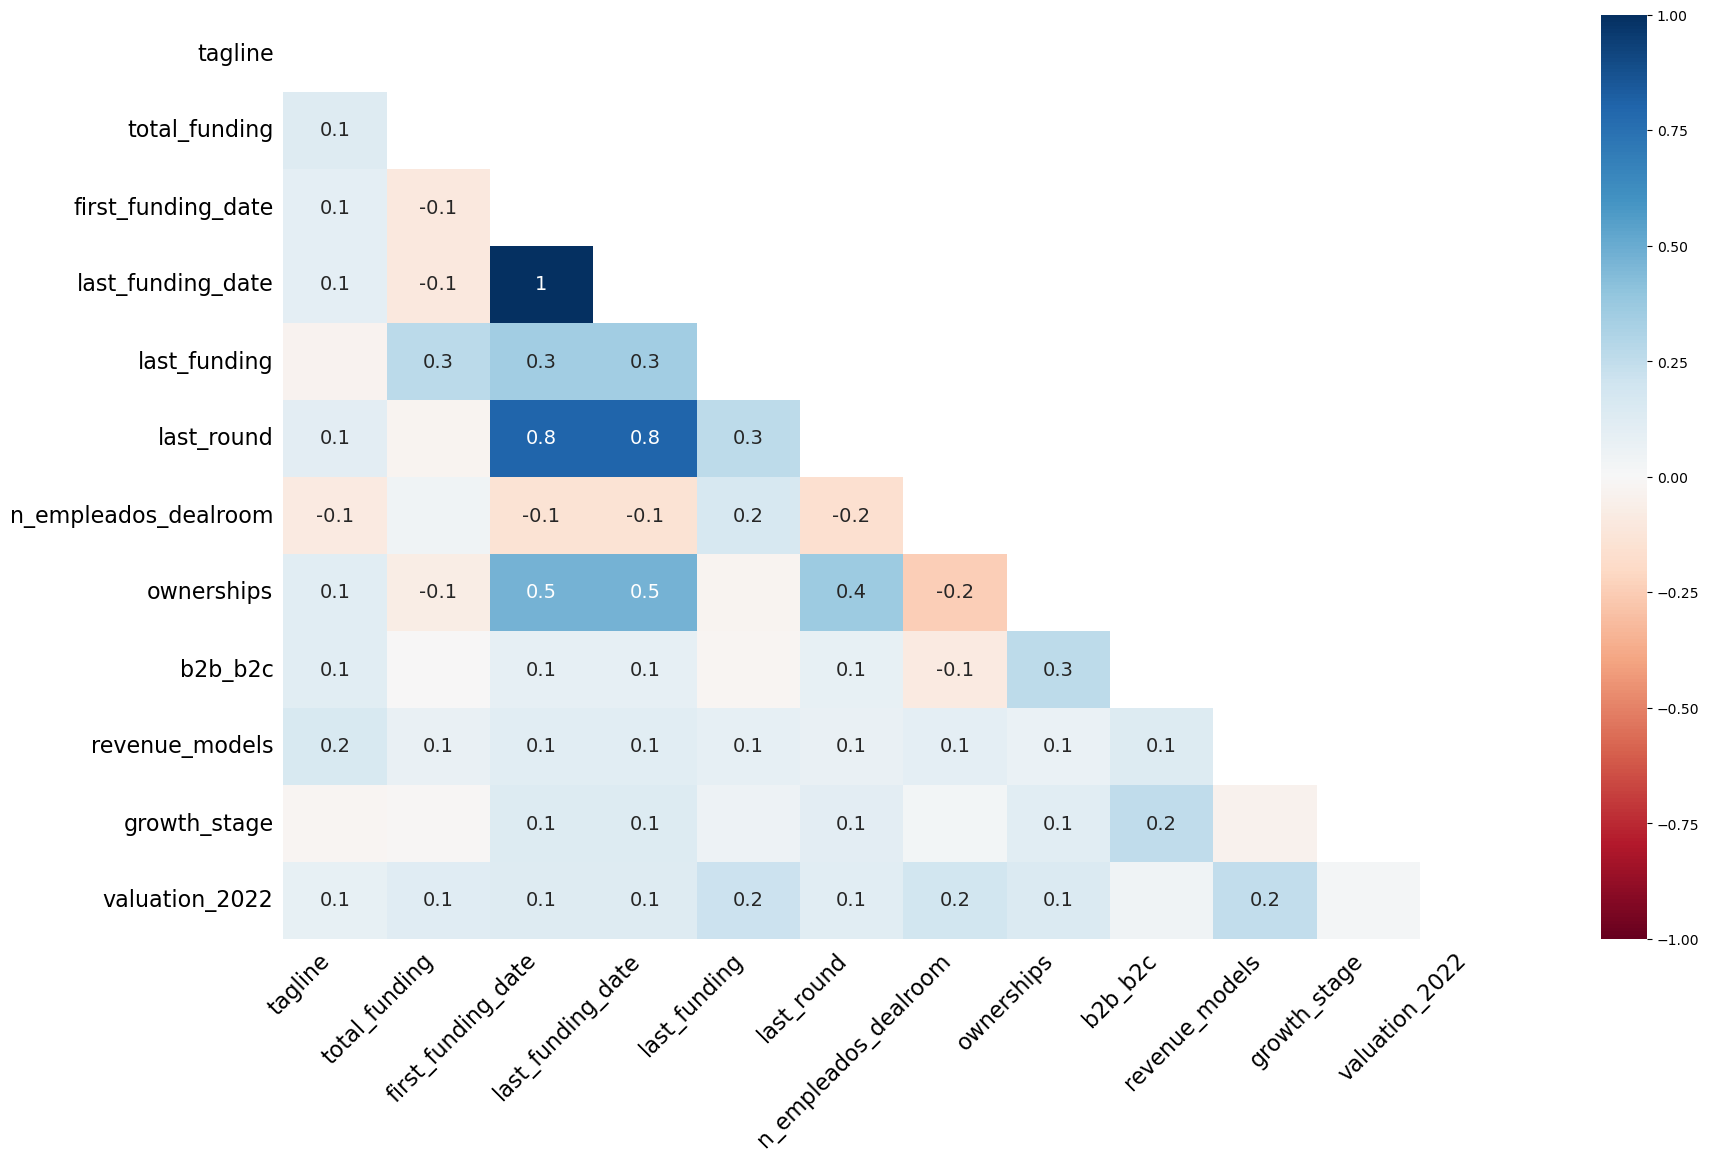

In [20]:
# correlograma de missing values
msno.heatmap(df_dealroom)

In [21]:
# columnas financieras
columnas_financieras= df_sabi_2.columns 
columnas_financieras= columnas_financieras.append(df_sabi_3_final.columns)
columnas_financieras.shape

(56,)

In [22]:
df_dealroom[df_dealroom['n_empleados_dealroom'].isna()]

,Codigo_NIF,name_dealroom,profile_url,website,tagline,total_funding,first_funding_date,last_funding_date,last_funding,last_round,total_rounds,n_empleados_dealroom,ownerships,b2b_b2c,revenue_models,growth_stage,company_status,valuation_2022
0,A78053147,Hostalia,https://app.dealroom.co/companies/hostalia,http://hostalia.com,NaN,0.00,NaN,NaN,NaN,NaN,0,NaN,bootstrapped,business,saas,1.0,operational,NaN
8,B01517721,Naivan,https://app.dealroom.co/companies/naivan,http://naivan.com,Laser Cut Folded and CNC Formed,0.00,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,manufacturing,1.0,operational,NaN
10,B75228635,Blue Agro,https://app.dealroom.co/companies/blue_agro,http://blueagro.com,"Conventional fertilizers (nitrogen, NPK, amend...",NaN,sep/2019,sep/2019,NaN,SUPPORT PROGRAM,1,NaN,accelerator,business,NaN,0.0,operational,NaN
12,B95745832,Bas Projects,https://app.dealroom.co/companies/bas_projects,http://bascorporation.com,Renewable energy and environment,NaN,dec/2013,dec/2013,NaN,SUPPORT PROGRAM,1,NaN,accelerator,business,NaN,1.0,operational,NaN
13,B95731071,Glefaran,https://app.dealroom.co/companies/glefaran,http://glefaran.com,Combustion of forest biomass for energy produc...,0.73,oct/2013,jan/2016,0.02,GRANT,4,NaN,accelerator,business,NaN,0.0,operational,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,B02731099,Ikosaedrika,https://app.dealroom.co/companies/ikosaedrika,https://ikosaedrika.com/,Development of new technologies for the creati...,0.08,jan/2020,apr/2021,NaN,SUPPORT PROGRAM,5,NaN,accelerator,business,NaN,0.0,operational,NaN
406,B95879177,Rotarm Solar Solutions,https://app.dealroom.co/companies/rotarm_solar...,http://rotarm.com,Equipment for installations related to energy ...,0.07,jan/2017,jun/2017,NaN,SUPPORT PROGRAM,3,NaN,accelerator,business,saas,0.0,operational,NaN
407,B95957643,Safybox,https://app.dealroom.co/companies/safybox,http://delibertyprimemailbox.com,Offers technological and innovative solutions ...,0.02,jan/2021,jan/2021,NaN,SUPPORT PROGRAM,2,NaN,accelerator,business,saas,0.0,operational,NaN
409,B01563881,Sdi System,https://app.dealroom.co/companies/sdi_system,http://sdi-system.com,Technologies for the management of victims of ...,0.09,jan/2018,jan/2019,0.03,GRANT,4,NaN,accelerator,business,NaN,0.0,operational,NaN


CONVERSION DE VARIABLES

In [23]:
# se convierte la primera letra de cada palabra a mayuscula
df_dealroom['last_funding_date']= df_dealroom['last_funding_date'].str.capitalize()
df_dealroom['first_funding_date']= df_dealroom['first_funding_date'].str.capitalize()
# hay un valor de fecha que aparece solo el ai±o, se pasa a formato mes/ai±o
indice = df_dealroom[df_dealroom['last_funding_date']=='2021'].index[0]
df_dealroom.at[indice, 'last_funding_date'] = 'Jan/2021'
indice = df_dealroom[df_dealroom['first_funding_date']=='2003'].index[0]
df_dealroom.at[indice, 'first_funding_date'] = 'Jan/2003'
indice = df_dealroom[df_dealroom['first_funding_date']=='2017'].index[0]
df_dealroom.at[indice, 'first_funding_date'] = 'Jan/2017'
# se pasan las fechas a datetime
df_dealroom['last_funding_date']= pd.to_datetime(df_dealroom['last_funding_date'], format='%b/%Y')
df_dealroom['first_funding_date']= pd.to_datetime(df_dealroom['first_funding_date'], format='%b/%Y')


In [24]:
print(df_dealroom['b2b_b2c'].value_counts())
print(df_dealroom['b2b_b2c'].isna().sum())

business             317
consumer              66
business;consumer     14
Name: b2b_b2c, dtype: int64
15


In [25]:
# se cogen las empresas que el campo b2b_b2c es NaN
empresas_b2b_b2c_nan= df_dealroom[df_dealroom['b2b_b2c'].isna()]
empresas_b2b_b2c_nan

,Codigo_NIF,name_dealroom,profile_url,website,tagline,total_funding,first_funding_date,last_funding_date,last_funding,last_round,total_rounds,n_empleados_dealroom,ownerships,b2b_b2c,revenue_models,growth_stage,company_status,valuation_2022
8,B01517721,Naivan,https://app.dealroom.co/companies/naivan,http://naivan.com,Laser Cut Folded and CNC Formed,0.000,NaT,NaT,NaN,NaN,0,NaN,NaN,NaN,manufacturing,1.0,operational,NaN
24,B20933560,Feelfree Rentals,https://app.dealroom.co/companies/feelfree_ren...,http://www.feelfreerentals.com,Alquiler online de apartamentos turísticos par...,0.000,NaT,NaT,NaN,NaN,0,32.0,NaN,NaN,NaN,1.0,operational,NaN
38,A95291613,VIRTUALWARE,https://app.dealroom.co/companies/virtualware_...,https://www.virtualwareco.com/,NaN,0.560,2009-01-01,2021-01-01,0.020,GRANT,24,52.0,NaN,NaN,NaN,2.0,operational,NaN
90,B75018168,DNA Data,https://app.dealroom.co/companies/dna_data,http://dnadata.es,"We conduct Covid-19 tests, book your appointme...",0.020,2012-01-01,2012-01-01,0.020,GRANT,2,NaN,NaN,NaN,manufacturing,0.0,operational,NaN
98,B95336517,Gistek Insurance Solutions,https://app.dealroom.co/companies/gistek_insur...,http://www.gistek-s.com,NaN,0.490,2018-01-01,2021-01-01,0.010,GRANT,4,15.0,Venture Capital,NaN,NaN,1.0,operational,NaN
112,B95285292,lorke systems,https://app.dealroom.co/companies/lorke_systems,http://lorke.es,Lorke Systems manufactures and markets Self-cl...,0.000,NaT,NaT,NaN,NaN,0,NaN,NaN,NaN,manufacturing,NaN,operational,NaN
115,B75140434,Modfie,https://app.dealroom.co/companies/modfie,http://modfie.com,Modfie. Your face. Your smile.,0.100,2015-11-01,2019-06-01,NaN,SERIES A,3,NaN,Venture Capital;accelerator,NaN,NaN,1.0,low-activity,0.28
119,B95694956,Innovative Hall Media Technologies,https://app.dealroom.co/companies/innovative_h...,http://www.innovativehall.com,NaN,0.010,2012-01-01,2012-01-01,0.010,GRANT,1,NaN,NaN,NaN,NaN,0.0,operational,NaN
152,B01505254,Solid Machine Vision,https://app.dealroom.co/companies/solid_machin...,https://solidmachinevision.com/en/,Machine Vision Solutions - Industry 4.0 - Seek...,0.000,NaT,NaT,NaN,NaN,0,7.0,NaN,NaN,NaN,0.0,operational,NaN
158,B48457402,Anbiolab,https://app.dealroom.co/companies/anbiolab,https://www.anbiolab.com/,NaN,0.030,2018-10-01,2019-01-01,0.030,GRANT,2,NaN,accelerator,NaN,NaN,0.0,operational,NaN


In [26]:
# se busca si es b2b o b2c a mano y se crea una funcion para automatizarlo
lista_empresa_consumer= ['Feelfree Rentals', 'Modfie', 'Worldpats', 'Kimet Sport', 'Puntodis', 'DNA Data' ]
lista_empresa_bussines= ['Hub Gasteiz', 'Quevedos Strategic Partners', 'Anbiolab', 'Solid Machine Vision', 'Innovative Hall Media Technologies', 'lorke systems',
'Gistek Insurance Solutions', 'VIRTUALWARE', 'Naivan', ]
for empresa in lista_empresa_consumer:
    df_dealroom.iloc[df_dealroom[df_dealroom['name_dealroom'] == empresa].index[0],13]= 'consumer'
for empresa in lista_empresa_bussines:
    df_dealroom.iloc[df_dealroom[df_dealroom['name_dealroom'] == empresa].index[0],13]= 'business'


In [27]:
# se pasan b2b a 1 en una columna, b2c a 1 en otra, y se dejan los que son ambos a 0
df_dealroom['b2b']= df_dealroom['b2b_b2c'].apply(lambda x: 1 if 'business' in x else 0)
df_dealroom['b2c']= df_dealroom['b2b_b2c'].apply(lambda x: 1 if 'consumer' in x else 0)

UNIi“N DE LOS DATAFRAMES EN UNO išNICO

In [28]:
# juntamos los dos df_sabi
df_sabi= pd.merge(df_sabi_1, df_sabi_2, on='Codigo_NIF', how='inner')
df_sabi_completo= pd.merge(df_sabi, df_sabi_3_final, on=['Codigo_NIF','year'], how='left')
# juntamos este df con el de dealroom
df= pd.merge(df_sabi_completo, df_dealroom, on='Codigo_NIF', how='inner')
df

,Codigo_NIF,Nombre_sabi,Localidad,Fecha constitucion,Codigo consolidacion,Codigo primario CNAE 2009,Forma juridica,Forma juridica detallada,Estado,Estado detallado,...,total_rounds,n_empleados_dealroom,ownerships,b2b_b2c,revenue_models,growth_stage,company_status,valuation_2022,b2b,b2c
0,A78053147,TELEFONICA SOLUCIONES DE INFORMATICA Y COMUNIC...,MADRID,1985/06/05,U2,6190,Sociedad anonima,Sociedad anónima unipersonal,Activa,Activa,...,0,NaN,bootstrapped,business,saas,1.0,operational,NaN,1,0
1,A78053147,TELEFONICA SOLUCIONES DE INFORMATICA Y COMUNIC...,MADRID,1985/06/05,U2,6190,Sociedad anonima,Sociedad anónima unipersonal,Activa,Activa,...,0,NaN,bootstrapped,business,saas,1.0,operational,NaN,1,0
2,B75103515,IRIZAR E-MOBILITY SL.,ADUNA,2014/01/21,U1,2910,Sociedad limitada,Sociedad limitada,Activa,Activa,...,1,115.0,accelerator,business,NaN,2.0,operational,NaN,1,0
3,B75103515,IRIZAR E-MOBILITY SL.,ADUNA,2014/01/21,U1,2910,Sociedad limitada,Sociedad limitada,Activa,Activa,...,1,115.0,accelerator,business,NaN,2.0,operational,NaN,1,0
4,B95864310,HAIZEA BILBAO SOCIEDAD LIMITADA.,ZIERBENA,2016/11/25,U1,2420,Sociedad limitada,Sociedad limitada,Activa,Activa,...,0,135.0,NaN,business,NaN,2.0,operational,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,B01563881,"STRUCTURAL DEFORMITY INDEX SYSTEM, SOCIEDAD LI...",VITORIA-GASTEIZ,2018/01/09,U1,6202,Sociedad limitada,Sociedad limitada,Activa,Activa,...,4,NaN,accelerator,business,NaN,0.0,operational,NaN,1,0
820,B95626842,SYMPLIO LIFESTYLE TECHNOLOGIES SOCIEDAD LIMITADA,BILBAO,2010/10/28,U1,6209,Sociedad limitada,Sociedad limitada,Activa,Reapertura de hoja registral: El Registro Merc...,...,0,3.0,not known;bootstrapped,business,NaN,0.0,operational,NaN,1,0
821,B95626842,SYMPLIO LIFESTYLE TECHNOLOGIES SOCIEDAD LIMITADA,BILBAO,2010/10/28,U1,6209,Sociedad limitada,Sociedad limitada,Activa,Reapertura de hoja registral: El Registro Merc...,...,0,3.0,not known;bootstrapped,business,NaN,0.0,operational,NaN,1,0
822,B95992509,YOID IDENTIDAD DIGITAL SOCIEDAD LIMITADA.,GETXO,2020/05/14,U1,6209,Sociedad limitada,Sociedad limitada,Activa,Activa,...,3,NaN,accelerator,business,saas,0.0,operational,NaN,1,0


AxesSubplot(0.125,0.11;0.698618x0.77)


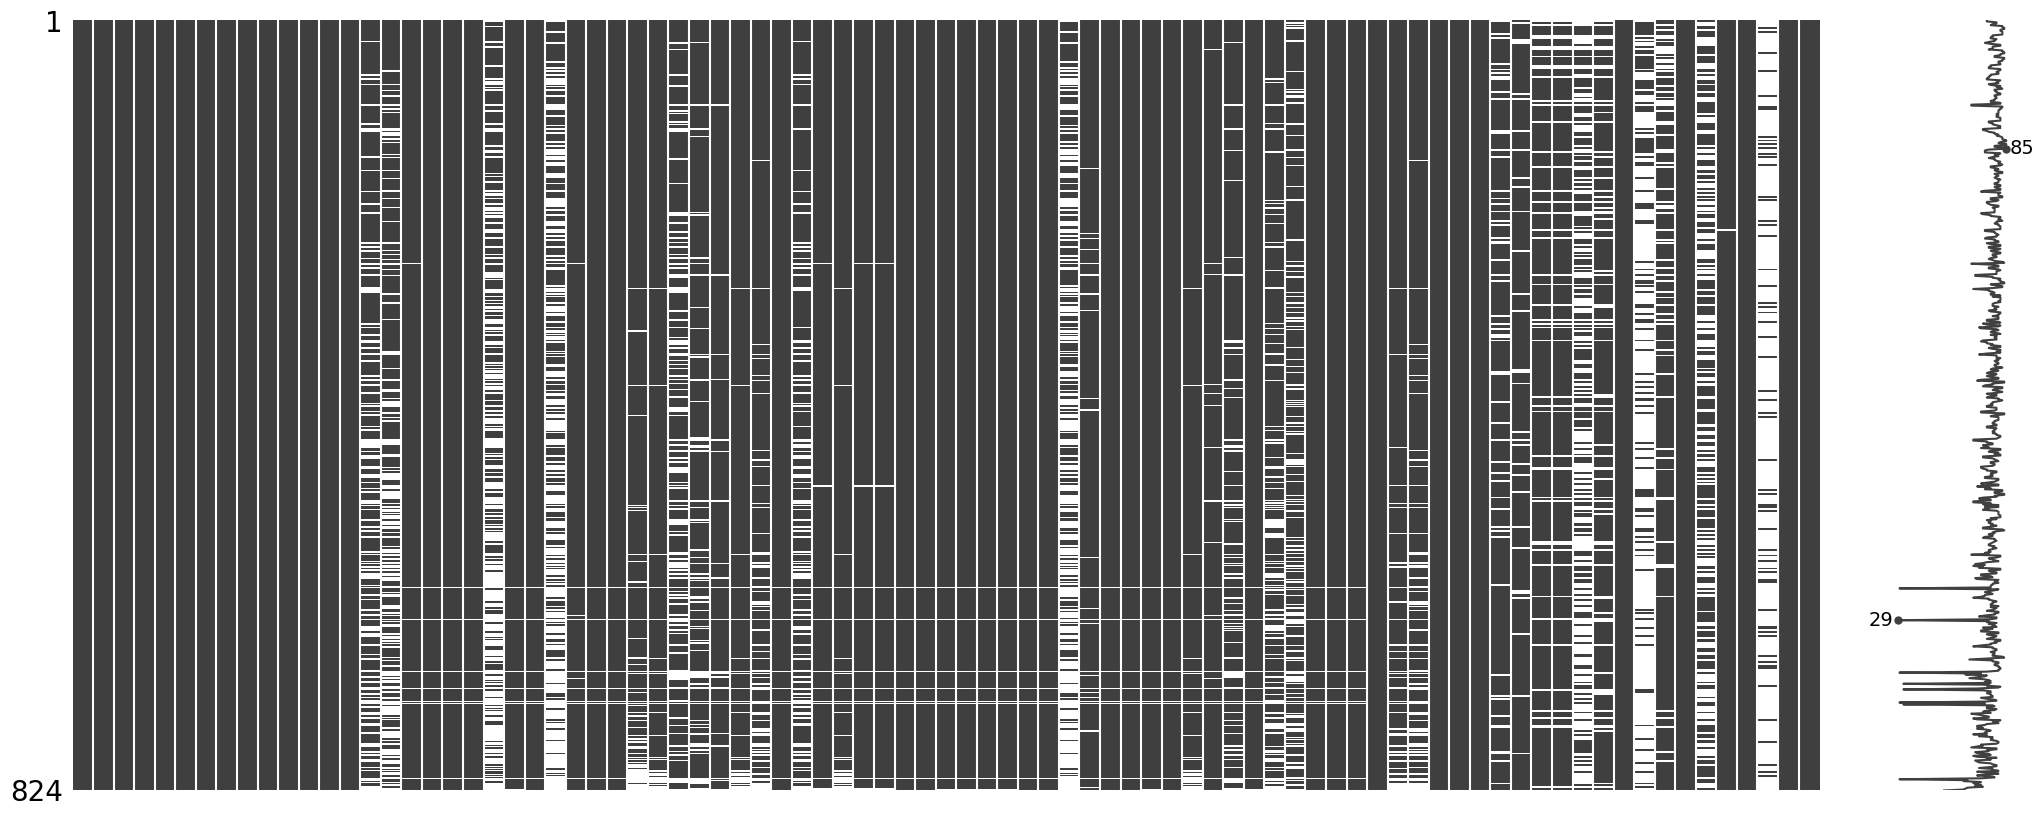

In [29]:
print(msno.matrix(df))

In [30]:
# se visualiza de las columnas en las que hay missings en la columna de empleados normal, cuantos missings hay en la de dealroom
print(df['Numero empleados'].isna().sum())
print(df[df.loc[:,'Numero empleados'].isna()]['n_empleados_dealroom'].isna().sum())
# hay 10 valores que no hay en la columna de sabi, pero si en la de dealroom, por lo que se indica
df['Numero empleados']= df.loc[:,'Numero empleados'].fillna(df['n_empleados_dealroom'])
# Ahora solo quedan 70 valores nulos en la columna de empleados, que son los que no tienen en ninguno de las dos df

94
83


In [31]:
summary_inicial= df.describe()

# Ideas de creacion de variables

In [32]:
# Tiempo que lleva la empresa en el mercado
# Tiempo desde creacion hasta primer round
# Tiempo desde primer round hasta ultimo round

CREACION DE NUEVAS VARIABLES EN EL NUEVO DATAFRAME

In [33]:
df['Fecha constitucion']=pd.to_datetime(df['Fecha constitucion'], format='%Y/%m/%d')

In [34]:
#se crea una variable para conocer los ai±os que lleva la empresa en el mercado
df['Anos en Mercado']= (2023-df['Fecha constitucion'].dt.year)
columnas = list(df.columns)
columnas.remove('Anos en Mercado')

# se altera el orden de las columnas para que los ai±os en el mercado vayan despues de la fecha de constitucion
columnas = columnas[:columnas.index("Fecha constitucion")+1] + ['Anos en Mercado'] + columnas[columnas.index("Fecha constitucion")+1:]
df = df.reindex(columns=columnas)

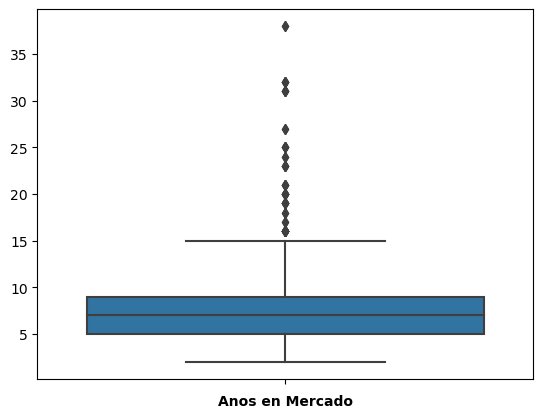

In [35]:
#Boxplot de la valoraciones en 2022.
sns.boxplot(y=df['Anos en Mercado'])
plt.xlabel('Anos en Mercado', weight='bold')
plt.ylabel('', weight='bold')
plt.show()

In [36]:
# revenue models a dummy con sklearn e ignorando los missings
df['revenue_models']= df['revenue_models'].fillna('missing')
opciones = ['saas', 'missing' ,'manufacturing', 'marketplace & ecommerce']
for opcion in opciones:
    df[f'revenue_{opcion}']= df['revenue_models'].apply(lambda x: 1 if opcion in x else 0)

In [37]:
df['last_funding_date']=pd.to_datetime(df['last_funding_date'], format='%Y/%m/%d')

In [38]:
#se crea una variable para conocer los ai±os desde que se realizon la ultima financiacion.
df['Anos desde ultima financiacion']= (2023-df['last_funding_date'].dt.year)
df['Anos desde ultima financiacion'].fillna(0, inplace=True)
df['Anos desde ultima financiacion'] = df['Anos desde ultima financiacion'].astype(int)

# se altera el orden de las columnas para que los ai±os desde ultima financiacion vayan despues de la fecha de ultima financiacion.
columnas = list(df.columns)
columnas.remove('Anos desde ultima financiacion')
columnas = columnas[:columnas.index('last_funding_date')+1] + ['Anos desde ultima financiacion'] + columnas[columnas.index('last_funding_date')+1:]
df = df.reindex(columns=columnas)

In [39]:
# se ven cuantas filas tienen missing la columna de last_funding entre las que valuation_2022 no es missing
print(df[(df['last_funding'].isna()) & (df['valuation_2022'].notna())].shape)
print(df[df['valuation_2022'].notna()].shape)
# una de cada 4 empresas que tiene valoracion en 2022 tiene missing en last_funding, asi que estari­a bien imputarla

(32, 91)
(120, 91)


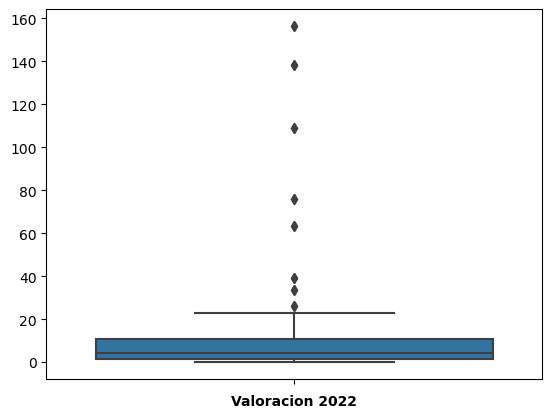

In [40]:
#Boxplot de la valoraciones en 2022.
sns.boxplot(y=df['valuation_2022'])
plt.xlabel('Valoracion 2022', weight='bold')
plt.ylabel('', weight='bold')
plt.show()

# Otras cosas a hacer

In [41]:
df['Forma juridica'] = df['Forma juridica'].fillna('Sociedad Limitada')
# se crea una variable dummy para saber si la empresa es una sociedad anonima o no
df['Sociedad_anonima']= df['Forma juridica'].apply(lambda x: 1 if 'Sociedad anonima' in x else 0)

In [42]:
df_finanzas= df.copy()

In [43]:
df_finanzas= df_finanzas[df_finanzas['valuation_2022'].isna()]
df_finanzas= df_finanzas[df_finanzas['growth_stage']!= 0]
df_finanzas= df_finanzas[df_finanzas['n_missings']<1]
df_finanzas= df_finanzas.drop_duplicates(subset=['Codigo_NIF'], keep='first')
df_finanzas.shape

(26, 92)

In [44]:
df['n_missings']=df.isna().sum(axis=1)
x=pd.DataFrame(df['n_missings'])

In [45]:
df['Inmovilizado mil EUR']=df['Inmovilizado mil EUR'].fillna(df['Total activo mil EUR'] - df['Activo circulante mil EUR'])
df['Activo circulante mil EUR']=df['Activo circulante mil EUR'].fillna(df['Total activo mil EUR'] - df['Inmovilizado mil EUR'].fillna(0))
df['Total activo mil EUR']=df['Total activo mil EUR'].fillna(df['Total pasivo y capital propio mil EUR'])

In [46]:
print((df['Activo circulante mil EUR']==df['Activo circulante mil EUR'].fillna(df['Total activo mil EUR'] - df['Inmovilizado mil EUR'])).sum())
print((df['Inmovilizado mil EUR']==df['Inmovilizado mil EUR'].fillna(df['Total activo mil EUR'] - df['Activo circulante mil EUR'])).sum())

816
816


In [47]:
#Sabiendo que -> df['Pasivo fijo mil EUR']=df['Pasivo fijo mil EUR'].fillna(df['Acreedores a L. P. mil EUR'].fillna(0)+df['Deudas financieras mil EUR'])
a= df['Pasivo liquido mil EUR']== df['Deudas financieras mil EUR'].fillna(0)+df['Acreedores comerciales mil EUR'].fillna(0)
print(a.sum())
b= df['Activo circulante mil EUR']== df['Existencias mil EUR'].fillna(0)+df['Deudores mil EUR'].fillna(0)+ df['Tesoreria mil EUR'].fillna(0)
print(b.sum())
print(df.shape)

7
290
(824, 92)


In [48]:
(df['Pasivo fijo mil EUR']-df['Acreedores comerciales mil EUR'] == df['Deudas financieras mil EUR']).sum()

0

In [49]:
# df['Fondos propios mil EUR']=df['Fondos propios mil EUR'].fillna(df['Capital suscrito mil EUR'].fillna(0)+df['Otros fondos propios mil EUR'].fillna(0))
df['Pasivo fijo mil EUR']=df['Pasivo fijo mil EUR'].fillna(df['Total pasivo y capital propio mil EUR'].fillna(0)-df['Pasivo liquido mil EUR'].fillna(0)-df['Fondos propios mil EUR'].fillna(0))
df['Pasivo liquido mil EUR']=df['Pasivo liquido mil EUR'].fillna(df['Total pasivo y capital propio mil EUR'].fillna(0)-df['Pasivo fijo mil EUR'].fillna(0)-df['Fondos propios mil EUR'].fillna(0))
df['Total pasivo']=(df['Pasivo fijo mil EUR']+df['Pasivo liquido mil EUR'])


In [50]:
# imputamos numero de empleados con gastos de personal y coste medio por empleado
df['Numero empleados']=df['Numero empleados'].fillna(df['Gastos de personal mil EUR']/df['Coste medio de los empleados mil'])
df['Coste medio de los empleados mil']=df['Coste medio de los empleados mil'].fillna(df['Gastos de personal mil EUR']/df['Numero empleados'])
df['Gastos de personal mil EUR']=df['Gastos de personal mil EUR'].fillna(df['Numero empleados']*df['Coste medio de los empleados mil'])


In [51]:
# imputamos el coste medio de los empleados haciendo una media por sector


In [52]:
(df['Resultado Actividades Ordinarias mil EUR']==df['Result. ordinarios antes Impuestos mil EUR']- df['Impuestos sobre sociedades mil EUR'].fillna(0)).sum()

577

In [53]:
#Realiza estos calculos si alguna de estas columnas es nula, y sustituye el valor nulo por el calculado
df['Impuestos sobre sociedades mil EUR']=df['Impuestos sobre sociedades mil EUR'].fillna(df['Result. ordinarios antes Impuestos mil EUR']-df['Resultado Actividades Ordinarias mil EUR'])

In [54]:
localidad= df['Localidad']

In [55]:
# Quitar columna forma juridica o forma juridica detallada, lo mismo con estado y estado detallado
df= df.drop('Forma juridica detallada', axis=1)
df= df.drop('Estado detallado', axis=1)
# se quita la columna de n_empleados_dealroom
df= df.drop('n_empleados_dealroom', axis=1)
# Quitar columnas que no aportan informacion (ejemplo: nombre de la empresa, pagina web, ciudad, etc)
df= df.drop('Localidad', axis=1)
# quitamos la columna de codigo de consolidacion porque casi todos los valores son de un tipo
df= df.drop('Codigo consolidacion', axis=1)
# quitamos la columna de estado porque son todos activas
df= df.drop('Estado', axis=1)
# quitamos tagline 
df= df.drop('tagline', axis=1)
# tambien website
df= df.drop('website', axis=1)
# profile_url
df= df.drop('profile_url', axis=1)
# name_dealroom porque ya salen en sabi
df= df.drop('name_dealroom', axis=1)
# n_missings
df= df.drop('n_missings', axis=1)
# company status
df= df.drop('company_status', axis=1) # el 95% son operational
# b2bc
df= df.drop('b2b_b2c', axis=1) # ya hay columnas si es b2b o b2c
# revenue models
df= df.drop('revenue_models', axis=1) # ya hay columnas dummies
# quitamos las fechas
df= df.drop('last_funding_date', axis=1)
df= df.drop('first_funding_date', axis=1)
df= df.drop('Fecha constitucion', axis=1)
# Quitar columna forma juridica 
df= df.drop('Forma juridica', axis=1)
# resultado de actividades ordinarias porque es igual que resultado del ejercicio
df= df.drop('Resultado Actividades Ordinarias mil EUR', axis=1)
# quitamos los inmovilizados materiales e inmateriales y nos quedamos con inmovilizado
df= df.drop('Inmovilizado material mil EUR', axis=1)
df= df.drop('Inmovilizado inmaterial mil EUR', axis=1)
# eliminamos existencias y â‚¬ % existencias
df= df.drop('Existencias mil EUR', axis=1)
df= df.drop('Rotacion de las existencias %', axis=1)
# quitamos dotaciones para amortizaciones de inmovilizado
df= df.drop('Dotaciones para amortiz. de inmovil. mil EUR', axis=1)
# gastos financieros
df= df.drop('Gastos financieros y gastos asimilados mil EUR', axis=1)
# free capital por ser todo ceros
df= df.drop('Free capital mil EUR', axis=1)
# otros fondos propios
df= df.drop('Otros fondos propios mil EUR', axis=1)

In [56]:
df['n_missings']=df.isna().sum(axis=1)
x['df_missings_final']= df['n_missings']

In [57]:
# buscamos los total_funding que son 0
print(df[df['total_funding']==0].shape)
# cuando el total_funding es 0, el last_funding tambii©n lo imputamos como 0
df.loc[df['total_funding']==0, 'last_funding']=0

# creamos ratio de last_funding sobre total_funding
df['ratio_last_funding']=df['last_funding']/df['total_funding']

(96, 67)


In [58]:
print(df['total_funding'].describe())
print(df['total_funding'].isna().sum())
print(df['ratio_last_funding'].describe())

count    762.00000
mean       0.85605
std        6.09767
min        0.00000
25%        0.03000
50%        0.05000
75%        0.14000
max      100.00000
Name: total_funding, dtype: float64
62
count    392.000000
mean       0.455620
std        0.327026
min        0.003546
25%        0.166667
50%        0.400000
75%        0.725000
max        1.000000
Name: ratio_last_funding, dtype: float64


In [59]:
# hacer el calculo de la diferencia entre las variables en el 2020 y 2021 (asi­ se puede sustituir por el valor del 2020)

CREACION DE RATIOS EN EL DF completo

In [60]:
# precio/ventas
# precio/ebitda
# precio/ebit
# precio/benecios (si tienen)
# tasa crecimiento ventas
# tasa crecimiento ingresos
# tasa crecimiento beneficios
# ratio de liquidez
# ratio de endeudamiento
# margen bruto
# Cash Burn Rate

In [61]:
df.loc[df['Pasivo fijo mil EUR']<0, 'Pasivo fijo mil EUR']=0
df.loc[df['Pasivo liquido mil EUR']<0, 'Pasivo liquido mil EUR']=0

In [62]:
df.loc[:,'Ratio de liquidez %']=df['Ratio de liquidez %'].fillna(((df['Activo circulante mil EUR'])/(df['Pasivo liquido mil EUR'])))
df.loc[:,'Ratio de solvencia %']=df['Ratio de solvencia %'].fillna(df['Ratio de liquidez %'])
df.loc[:,'Ratio_endeudamiento']=df['Total pasivo y capital propio mil EUR']/df['Total pasivo']

df.loc[:,'Margen_bruto(costes trabajadores)']=(df['Ingresos de explotacion mil EUR']-df['Coste medio de los empleados mil'])/(df['Ingresos de explotacion mil EUR']*100)

In [63]:
# se ven cuantas columnas tienen 1 o mas missings
print(df.isna().sum()[df.isna().sum()>0].sort_values(ascending=False).count())
variables_con_missings= df.isna().sum()[df.isna().sum()>0].sort_values(ascending=False)
variables_con_missings_columnas= list(variables_con_missings.index)

50


Se continua con la imputacion de variables antes de crear nuevos df

In [64]:
# se actualiza la lista de variables financieras
variables_financieras_eliminadas= ['Resultado Actividades Ordinarias mil EUR', 'Inmovilizado material mil EUR',
 'Inmovilizado inmaterial mil EUR', 'Existencias mil EUR', 'Rotacion de las existencias %', 
 'Dotaciones para amortiz. de inmovil. mil EUR', 'Gastos financieros y gastos asimilados mil EUR', 'Tesoreria mil EUR',
  'Otros fondos propios mil EUR']
columnas_financieras_completas= columnas_financieras.drop(['year', 'Codigo_NIF', 'n_missings']).drop(variables_financieras_eliminadas)
columnas_financieras_completas= columnas_financieras_completas.append(pd.Index(['Total pasivo']))

# se divide el valor de la columna en 2021 entre el valor de la columna en 2020
# y se calcula la media de crecimiento de cada empresa entre 2020 y 2021 para cada columna financiera y se 
# guarda en un diccionario y si hay un mi


# crecimiento_2020_2021 = {}
# for columna in columnas_financieras_completas:
#     diff = df.loc[df['year'] == 2021, columna].fillna(0) - df.loc[df['year'] == 2020, columna].fillna(0)
#     crecimiento_2020_2021[columna] = np.median(diff)
# crecimiento_2020_2021

In [65]:
df_antes_nif= df.copy()

In [66]:
variables_con_missings_antes_nif= df_antes_nif.isna().sum()[df_antes_nif.isna().sum()>0].sort_values(ascending=False)
variables_con_missings_antes_nif
variables_con_missings_antes_nif_copy=variables_con_missings_antes_nif.copy()

In [67]:
df_antes_nif = df_antes_nif[['Codigo_NIF', 'Coste medio de los empleados mil', 'Deudas financieras mil EUR', 'Periodo de cobro (dias) dias', 'Ingresos de explotacion mil EUR', 'Acreedores comerciales mil EUR']]

In [68]:
# se añade el sufijo con_missings al df_antes_nif
df_antes_nif.columns = df_antes_nif.columns + '_missings'

In [69]:
# se crea un for para que si una empresa tiene un missing en una columna financiera en un año, 
# se sustituye por el del año anterior o posterior

for nif in df['Codigo_NIF'].unique():
    for columna in variables_con_missings_columnas:
        if df.loc[(df['Codigo_NIF']==nif) & (df['year']==2020), columna].isna().values[0]:
            df.loc[(df['Codigo_NIF']==nif) & (df['year']==2020), columna]=df.loc[(df['Codigo_NIF']==nif) & (df['year']==2021), columna].values[0]
        if df.loc[(df['Codigo_NIF']==nif) & (df['year']==2021), columna].isna().values[0]:
            df.loc[(df['Codigo_NIF']==nif) & (df['year']==2021), columna]=df.loc[(df['Codigo_NIF']==nif) & (df['year']==2020), columna].values[0]


In [70]:
variables_eliminar= ['ratio_last_funding','last_round', 'last_funding', 'ownerships', 'Tesoreria mil EUR', 'n_missings' ]
df= df.drop(variables_eliminar, axis=1)

In [71]:
# cuantas empresas tienen las 2 variables missings
print((df[(df['Costes de los trabajadores / Ingresos de explotacion (%) %'].isna())&(df['Ingresos de explotacion mil EUR'].isna())]).shape)
print((df[(df['Costes de los trabajadores / Ingresos de explotacion (%) %'].isna())&(df['Numero empleados'].isna())]).shape)
print((df[(df['Ingresos de explotacion mil EUR'].isna())&(df['Importe neto Cifra de Ventas mil EUR'].isna())]).shape)

(12, 64)
(6, 64)
(12, 64)


In [72]:
df.loc[df['growth_stage'].isna(), 'growth_stage']= 0 # se asigna el valor más común
df.loc[df['Deudores mil EUR'].isna(), 'Deudores mil EUR']= 0 # se considera que no hay deudores

In [73]:
# correlacion deudas financieras con otras variables
df.corr()['Deudas financieras mil EUR'].sort_values(ascending=False)

C:\Users\ikerm\AppData\Local\Temp\ipykernel_15512\3926541681.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Deudas financieras mil EUR'].sort_values(ascending=False)


Deudas financieras mil EUR                    1.000000
Activo circulante mil EUR                     0.983173
Total pasivo                                  0.974209
Total pasivo y capital propio mil EUR         0.961158
Total activo mil EUR                          0.961158
                                                ...   
EBIT mil EUR                                 -0.318957
Resultado Explotacion mil EUR                -0.318957
Cash flow mil EUR                            -0.365636
Result. ordinarios antes Impuestos mil EUR   -0.419249
Resultado del Ejercicio mil EUR              -0.439965
Name: Deudas financieras mil EUR, Length: 62, dtype: float64

In [74]:
# para imputar coste medio de los empleados, se agrupa por CNAE y se calcula el coste medio
df['Codigo primario CNAE adaptado']= df['Codigo primario CNAE 2009'].apply(lambda x: round(x/100,0))
df['Coste medio de los empleados mil']=df['Coste medio de los empleados mil'].fillna(df.groupby('Codigo primario CNAE adaptado')['Coste medio de los empleados mil'].transform('median'))
df['Costes de los trabajadores / Ingresos de explotacion (%) %']= df['Costes de los trabajadores / Ingresos de explotacion (%) %'].fillna(df.groupby('Codigo primario CNAE 2009')['Costes de los trabajadores / Ingresos de explotacion (%) %'].transform('median'))
df['Deudas financieras mil EUR']= df['Deudas financieras mil EUR'].fillna(df.groupby('Codigo primario CNAE 2009')['Deudas financieras mil EUR'].transform('median'))
df['Acreedores a L. P. mil EUR']= df['Acreedores a L. P. mil EUR'].fillna(df.groupby('Codigo primario CNAE 2009')['Acreedores a L. P. mil EUR'].transform('median'))
df['Acreedores comerciales mil EUR']= df['Acreedores comerciales mil EUR'].fillna(df.groupby('Codigo primario CNAE 2009')['Acreedores comerciales mil EUR'].transform('median'))
df['Periodo de cobro (dias) dias']= df['Periodo de cobro (dias) dias'].fillna(df.groupby('Codigo primario CNAE 2009')['Periodo de cobro (dias) dias'].transform('median'))
df['Margen de beneficio (%) %']= df['Margen de beneficio (%) %'].fillna(df.groupby('Codigo primario CNAE 2009')['Margen de beneficio (%) %'].transform('median'))
df= df.drop('Codigo primario CNAE adaptado', axis=1)

In [75]:
from sklearn.linear_model import LinearRegression

def imputacion_reg_lineal(df, var_dependiente, var_independiente):
    missings = df[df[var_dependiente].isna()]
    no_missings = df.dropna(subset=[var_dependiente])

    modelo = LinearRegression().fit(no_missings[[var_independiente]], no_missings[var_dependiente])
    prediccion = modelo.predict(missings[[var_independiente]])
    df.loc[df[var_dependiente].isna(), var_dependiente] = prediccion

    return df

In [76]:
# se busca primero la correlacion entre las variables e ingresos de explotacion
df.corr()['Ingresos de explotacion mil EUR'].sort_values(ascending=False) # deudores tiene una correlacion muy alta
# se imputan los ingresos de explotacion
imputacion_reg_lineal(df, 'Ingresos de explotacion mil EUR', 'Deudores mil EUR')

C:\Users\ikerm\AppData\Local\Temp\ipykernel_15512\2077134611.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Ingresos de explotacion mil EUR'].sort_values(ascending=False) # deudores tiene una correlacion muy alta


,Codigo_NIF,Nombre_sabi,Anos en Mercado,Codigo primario CNAE 2009,Capital social mil EUR,Porcentaje_adquisicion_cat,year,Acreedores a L. P. mil EUR,Acreedores comerciales mil EUR,Activo circulante mil EUR,...,b2b,b2c,revenue_saas,revenue_missing,revenue_manufacturing,revenue_marketplace & ecommerce,Sociedad_anonima,Total pasivo,Ratio_endeudamiento,Margen_bruto(costes trabajadores)
0,A78053147,TELEFONICA SOLUCIONES DE INFORMATICA Y COMUNIC...,38,6190,2000.00000,2,2021,15314.000000,339928.00000,1.032835e+06,...,1,0,1,0,0,0,1,1.036921e+06,1.141450,0.009999
1,A78053147,TELEFONICA SOLUCIONES DE INFORMATICA Y COMUNIC...,38,6190,2000.00000,2,2020,16336.000000,346970.00000,9.319840e+05,...,1,0,1,0,0,0,1,8.914370e+05,1.163585,0.009999
2,B75103515,IRIZAR E-MOBILITY SL.,9,2910,20500.00000,1,2021,61152.908000,19954.26000,1.523307e+05,...,1,0,0,1,0,0,0,1.586332e+05,1.050167,0.009996
3,B75103515,IRIZAR E-MOBILITY SL.,9,2910,20500.00000,1,2020,83608.494000,12554.31400,1.079037e+05,...,1,0,0,1,0,0,0,1.396423e+05,0.876067,0.009992
4,B95864310,HAIZEA BILBAO SOCIEDAD LIMITADA.,7,2420,7515.00000,1,2021,17489.000000,11920.00000,5.589500e+04,...,1,0,0,1,0,0,0,8.049300e+04,1.285068,0.009994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,B01563881,"STRUCTURAL DEFORMITY INDEX SYSTEM, SOCIEDAD LI...",5,6202,33.00000,0,2020,32.922949,7.78656,7.254944e+01,...,1,0,0,1,0,0,0,3.421774e+01,4.411898,NaN
820,B95626842,SYMPLIO LIFESTYLE TECHNOLOGIES SOCIEDAD LIMITADA,13,6209,140.74992,1,2021,151.250090,21.61488,2.083350e+00,...,1,0,0,1,0,0,0,5.325108e+01,2.212228,NaN
821,B95626842,SYMPLIO LIFESTYLE TECHNOLOGIES SOCIEDAD LIMITADA,13,6209,140.74992,1,2020,151.250090,21.34232,1.608430e+00,...,1,0,0,1,0,0,0,4.375131e+01,2.931632,NaN
822,B95992509,YOID IDENTIDAD DIGITAL SOCIEDAD LIMITADA.,3,6209,100.00000,0,2021,151.250090,13.67807,3.431198e+01,...,1,0,1,0,0,0,0,0.000000e+00,inf,NaN


In [77]:
df['Coste medio de los empleados mil']=df['Coste medio de los empleados mil'].fillna(df['Costes de los trabajadores / Ingresos de explotacion (%) %']* df['Ingresos de explotacion mil EUR']/100/df['Numero empleados'])

In [78]:
# numero de empleados
df['Numero empleados']=df['Numero empleados'].fillna(round((df['Costes de los trabajadores / Ingresos de explotacion (%) %']* df['Ingresos de explotacion mil EUR']/100/df['Coste medio de los empleados mil']),0))
df['Gastos de personal mil EUR']= df['Gastos de personal mil EUR'].fillna(df['Coste medio de los empleados mil']*df['Numero empleados'])

In [79]:
# se crea ahora que no hay NAs
df.loc[:,'Margen_bruto(costes trabajadores)']=(df['Ingresos de explotacion mil EUR']-df['Coste medio de los empleados mil'])/(df['Ingresos de explotacion mil EUR']*100)

In [80]:
variables= df[['Codigo_NIF', 'Coste medio de los empleados mil', 'Deudas financieras mil EUR', 'Periodo de cobro (dias) dias', 'Ingresos de explotacion mil EUR', 'Acreedores comerciales mil EUR']]
# se añaden las columnas a df_antes_nif
df_antes_nif_concatenado= pd.concat([df_antes_nif, variables], axis=1)

In [81]:
# importe neto de ventas con ingresos de explotacion
imputacion_reg_lineal(df, 'Importe neto Cifra de Ventas mil EUR', 'Ingresos de explotacion mil EUR')
# total funding con gastos financieros
imputacion_reg_lineal(df, 'Deudas financieras mil EUR', 'Total pasivo')
# imputacion_reg_lineal(df, 'total_funding', 'Gastos financieros mil EUR')
imputacion_reg_lineal(df, 'Acreedores comerciales mil EUR', 'Deudas financieras mil EUR')
# imputacion_reg_lineal(df, 'Acreedores a L. P. mil EUR', 'Gastos financieros mil EUR')

# hay 3 valores de importe neto de ventas que son menores que 0, así que se ponen en positivo
df.loc[df['Importe neto Cifra de Ventas mil EUR']<0, 'Importe neto Cifra de Ventas mil EUR']= \
df.loc[df['Importe neto Cifra de Ventas mil EUR']<0, 'Importe neto Cifra de Ventas mil EUR']*-1

In [82]:
print(df['Deudas financieras mil EUR'].describe())
print(df[df['Deudas financieras mil EUR']>=0]['Deudas financieras mil EUR'].describe())
aa= df[df['Deudas financieras mil EUR']<0]

count      824.000000
mean       306.529369
std       2395.640900
min          0.000720
25%         15.358480
50%         33.466915
75%        144.776637
max      40277.425890
Name: Deudas financieras mil EUR, dtype: float64
count      824.000000
mean       306.529369
std       2395.640900
min          0.000720
25%         15.358480
50%         33.466915
75%        144.776637
max      40277.425890
Name: Deudas financieras mil EUR, dtype: float64


In [83]:
df.isna().sum()[df.isna().sum()>0].sort_values(ascending=False)

valuation_2022                704
total_funding                  62
Acreedores a L. P. mil EUR     40
dtype: int64

In [84]:
df_antes_nif_concatenado= pd.concat([df_antes_nif, variables], axis=1)

In [85]:
# se buscan empresas que no coincida la suma de pasivos y fondos propios con el total de activos
pasivo_empresas=df[round((df['Total pasivo']+ df['Fondos propios mil EUR']),5)!= round(df['Total activo mil EUR'],5)]
df.loc[pasivo_empresas.index, 'Pasivo fijo mil EUR']= (df.loc[pasivo_empresas.index, 'Total activo mil EUR'] - df.loc[pasivo_empresas.index, 'Fondos propios mil EUR']) * 0.47
df.loc[pasivo_empresas.index, 'Pasivo liquido mil EUR']= (df.loc[pasivo_empresas.index, 'Total activo mil EUR'] - df.loc[pasivo_empresas.index, 'Fondos propios mil EUR']) * 0.53

In [86]:
df.loc[df['Numero empleados']<=0, 'Numero empleados']=1

In [87]:
# variables con outliers
sumary= df.describe()

In [88]:
df[df['Fondos propios mil EUR']<0]

,Codigo_NIF,Nombre_sabi,Anos en Mercado,Codigo primario CNAE 2009,Capital social mil EUR,Porcentaje_adquisicion_cat,year,Acreedores a L. P. mil EUR,Acreedores comerciales mil EUR,Activo circulante mil EUR,...,b2b,b2c,revenue_saas,revenue_missing,revenue_manufacturing,revenue_marketplace & ecommerce,Sociedad_anonima,Total pasivo,Ratio_endeudamiento,Margen_bruto(costes trabajadores)
3,B75103515,IRIZAR E-MOBILITY SL.,9,2910,20500.00000,1,2020,83608.494000,12554.314000,107903.65500,...,1,0,0,1,0,0,0,139642.324000,0.876067,0.009992
41,B86767761,WEGOW TECHNOLOGIES SOCIEDAD LIMITADA.,10,6312,194.52166,0,2020,1722.177000,218.273000,3352.69800,...,1,1,1,0,0,1,0,5442.126000,0.970185,0.009922
64,B95953683,LIBERE HOSPITALITY SOCIEDAD LIMITADA.,4,7022,50.00000,0,2021,2069.480110,2195.030230,1098.28718,...,0,1,0,0,0,1,0,5092.876370,0.852560,0.009869
116,B01518620,GLOBETESTING NORTE SOCIEDAD LIMITADA.,9,6201,3.00000,2,2021,88.831365,3.527310,1074.15346,...,0,1,1,0,0,0,0,1161.794869,0.943396,0.009821
156,B75105643,GUAJIRA SICODELICA SL.,9,5630,60.00000,0,2021,395.555370,82.639590,248.35809,...,1,0,0,1,0,0,0,663.301460,0.820534,0.009815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,B01583350,"TITHONUS BIORESOURCES, S.L.",4,7211,3.00000,0,2020,211.362500,4.141380,3.75159,...,0,1,0,1,0,0,0,5.689350,0.659406,-0.042019
787,B71242499,BIOMEDICAL HEALTH SYSTEM SL.,8,7219,3.00100,2,2020,324.626260,2.088560,9.10625,...,0,1,0,1,0,0,0,118.042330,0.329190,-0.048540
801,B95986733,BAY OF BISCAY AQUATICS SOCIEDAD LIMITADA.,3,321,3.00000,0,2020,190.375390,1104.761927,46.56125,...,1,0,0,0,1,0,0,191.340410,0.989856,0.003529
806,B75215228,BIMERTEK SL.,4,2651,3.00000,0,2021,35.981450,43.003735,27.52835,...,1,0,1,0,0,0,0,113.062470,0.801970,0.009201


In [89]:
df=df.applymap(lambda x: 99999 if x== np.inf else x)
df=df.applymap(lambda x: -99999 if x== -np.inf else x)

Creacion dfs nuevos

In [90]:
df_pivotado= df.pivot_table(index='Codigo_NIF', columns='year', values=columnas_financieras_completas,)
df_pivotado_columnas= df_pivotado.columns
df_pivotado_copia= df_pivotado.copy()

In [91]:
# se pasan las columnas de los años de df_pivotado como sufijo de las columnas de df_pivotado
df_pivotado.columns= df_pivotado.columns.map('{0[0]}_{0[1]}'.format)
df_pivotado= df_pivotado.reset_index()
# luego se añaden el resto de columnas de df seleccionando las que no estan en df_pivotado
columnas= columnas_financieras_completas.tolist()
df_adquisicion_completo= pd.merge(df_pivotado, df.loc[:,~df.columns.isin(columnas)], on= 'Codigo_NIF', how='left')

# se quita 1 de cada 2 filas porque hay duplicados
df_adquisicion_completo= df_adquisicion_completo.drop_duplicates(subset='Codigo_NIF', keep='first')

df_adquisicion_completo

,Codigo_NIF,Acreedores a L. P. mil EUR_2020,Acreedores a L. P. mil EUR_2021,Acreedores comerciales mil EUR_2020,Acreedores comerciales mil EUR_2021,Activo circulante mil EUR_2020,Activo circulante mil EUR_2021,Apalancamiento (%) %_2020,Apalancamiento (%) %_2021,Capital suscrito mil EUR_2020,...,valuation_2022,b2b,b2c,revenue_saas,revenue_missing,revenue_manufacturing,revenue_marketplace & ecommerce,Sociedad_anonima,Ratio_endeudamiento,Margen_bruto(costes trabajadores)
0,A48464788,2000.08371,4064.24000,1266.76386,1109.99100,9702.80900,1.089652e+04,17.333,38.070,745.33015,...,NaN,1,0,0,0,1,0,1,2.739345,0.009965
2,A48500052,NaN,NaN,601.99724,268.59101,2020.73863,1.655867e+03,3.714,3.836,291.48500,...,NaN,1,0,0,0,0,1,1,3.255634,0.009650
4,A78053147,16336.00000,15314.00000,346970.00000,339928.00000,931984.00000,1.032835e+06,122.989,147.861,2000.00000,...,NaN,1,0,1,0,0,0,1,1.141450,0.009999
6,A95291613,1679.45236,1461.10743,29.42460,329.67108,2149.57949,3.662167e+03,143.954,249.142,213.50000,...,NaN,1,0,0,1,0,0,1,1.187363,0.009842
8,A95363859,37146.00000,37482.00000,17485.00000,14522.00000,106811.00000,9.370000e+04,22.938,22.586,13301.00000,...,NaN,1,0,0,0,1,0,1,3.395075,0.009978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,B95987319,175.00000,671.00796,11.85300,203.77460,264.06800,6.866940e+02,73.760,105.216,3.37200,...,4.32,1,0,1,0,0,0,0,1.701195,0.005950
816,B95989059,272.87914,242.17619,69.31906,74.04327,162.67544,1.984251e+02,5694.805,-509.103,60.00000,...,NaN,1,0,1,0,0,0,0,0.925897,0.009678
818,B95990164,90.31462,1237.47139,3.52731,3.52731,42.28499,3.860934e+02,3105.761,-1770.621,3.05000,...,6.62,1,0,1,0,0,0,0,0.947760,0.006331
820,B95992509,151.25009,151.25009,13.67807,13.67807,100.00000,3.431198e+01,0.000,0.000,100.00000,...,NaN,1,0,1,0,0,0,0,99999.000000,0.009331


In [92]:
# se crea otro df quitando las columnas de 2020
df_adquisicion_2021= df_adquisicion_completo.drop(df_adquisicion_completo.filter(regex='_2020').columns, axis=1)
df_adquisicion_2021

,Codigo_NIF,Acreedores a L. P. mil EUR_2021,Acreedores comerciales mil EUR_2021,Activo circulante mil EUR_2021,Apalancamiento (%) %_2021,Capital suscrito mil EUR_2021,Cash flow mil EUR_2021,Coeficiente de solvencia (%) %_2021,Coste medio de los empleados mil_2021,Costes de los trabajadores / Ingresos de explotacion (%) %_2021,...,valuation_2022,b2b,b2c,revenue_saas,revenue_missing,revenue_manufacturing,revenue_marketplace & ecommerce,Sociedad_anonima,Ratio_endeudamiento,Margen_bruto(costes trabajadores)
0,A48464788,4064.24000,1109.99100,1.089652e+04,38.070,745.330,3296.408000,63.494,47.869275,24.3520,...,NaN,1,0,0,0,1,0,1,2.739345,0.009965
2,A48500052,NaN,268.59101,1.655867e+03,3.836,291.485,-35.104810,69.284,76.509246,20.9940,...,NaN,1,0,0,0,0,1,1,3.255634,0.009650
4,A78053147,15314.00000,339928.00000,1.032835e+06,147.861,2000.000,3589.000000,12.392,106.927094,7.6450,...,NaN,1,0,1,0,0,0,1,1.141450,0.009999
6,A95291613,1461.10743,329.67108,3.662167e+03,249.142,158.970,-72.670569,15.779,49.505594,50.4630,...,NaN,1,0,0,1,0,0,1,1.187363,0.009842
8,A95363859,37482.00000,14522.00000,9.370000e+04,22.586,13301.000,3670.000000,70.545,118.524590,13.3690,...,NaN,1,0,0,0,1,0,1,3.395075,0.009978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,B95987319,671.00796,203.77460,6.866940e+02,105.216,4.304,-225.585160,41.217,49.248393,323.9680,...,4.32,1,0,1,0,0,0,0,1.701195,0.005950
816,B95989059,242.17619,74.04327,1.984251e+02,-509.103,90.000,-34.360860,-8.003,35.102773,83.7410,...,NaN,1,0,1,0,0,0,0,0.925897,0.009678
818,B95990164,1237.47139,3.52731,3.860934e+02,-1770.621,3.050,-63.480299,-5.511,61.948092,330.2190,...,6.62,1,0,1,0,0,0,0,0.947760,0.006331
820,B95992509,151.25009,13.67807,3.431198e+01,0.000,100.000,-0.620280,100.000,38.557504,57.7375,...,NaN,1,0,1,0,0,0,0,99999.000000,0.009331


In [93]:
# se calcula el ratio de crecimiento de las variables financieras entre 2020 y 2021
df_pivotado_ratios= pd.DataFrame()
for col in df_pivotado_columnas.get_level_values(0):
    df_pivotado_ratios[col+'_ratio']=df_pivotado_copia[col][2021]/df_pivotado_copia[col][2020]
df_pivotado_ratios= df_pivotado_ratios.reset_index()

In [94]:
# se junta el df de ratios con el df de adquisicion
df_adquisicion_final= pd.merge(df_pivotado_ratios,df_adquisicion_2021 , on='Codigo_NIF', how='left')
df_adquisicion_final=df_adquisicion_final.applymap(lambda x: 99999 if x== np.inf else x)
df_adquisicion_final=df_adquisicion_final.applymap(lambda x: -99999 if x== -np.inf else x)
df_adquisicion_final= df_adquisicion_final.fillna(0)
df_adquisicion_final

,Codigo_NIF,Acreedores a L. P. mil EUR_ratio,Acreedores comerciales mil EUR_ratio,Activo circulante mil EUR_ratio,Apalancamiento (%) %_ratio,Capital suscrito mil EUR_ratio,Cash flow mil EUR_ratio,Coeficiente de solvencia (%) %_ratio,Coste medio de los empleados mil_ratio,Costes de los trabajadores / Ingresos de explotacion (%) %_ratio,...,valuation_2022,b2b,b2c,revenue_saas,revenue_missing,revenue_manufacturing,revenue_marketplace & ecommerce,Sociedad_anonima,Ratio_endeudamiento,Margen_bruto(costes trabajadores)
0,A48464788,2.032035,0.876241,1.123027,2.196388,1.000000,1.084481,0.867002,1.079142,1.046273,...,0.00,1,0,0,0,1,0,1,2.739345,0.009965
1,A48500052,0.000000,0.446167,0.819437,1.032849,1.000000,0.972424,1.188221,1.023458,0.974969,...,0.00,1,0,0,0,0,1,1,3.255634,0.009650
2,A78053147,0.937439,0.979704,1.108211,1.202229,1.000000,0.028017,0.881491,1.299568,1.017570,...,0.00,1,0,1,0,0,0,1,1.141450,0.009999
3,A95291613,0.869990,11.203927,1.703667,1.730706,0.744590,0.185162,0.501350,1.228400,0.560756,...,0.00,1,0,0,1,0,0,1,1.187363,0.009842
4,A95363859,1.009045,0.830540,0.877250,0.984654,1.000000,1.389099,1.024902,0.960552,0.682127,...,0.00,1,0,0,0,1,0,1,3.395075,0.009978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,B95987319,3.834331,17.191816,2.600444,1.426464,1.276394,-26.932326,1.721535,1.628625,5.672503,...,4.32,1,0,1,0,0,0,0,1.701195,0.005950
408,B95989059,0.887485,1.068152,1.219761,-0.089398,1.500000,4.766860,-8.149695,1.318442,1.016410,...,0.00,1,0,1,0,0,0,0,0.925897,0.009678
409,B95990164,13.701784,1.000000,9.130745,-0.570109,1.000000,446.949933,-1.766912,1.000000,99999.000000,...,6.62,1,0,1,0,0,0,0,0.947760,0.006331
410,B95992509,1.000000,1.000000,0.343120,0.000000,1.000000,-99999.000000,1.000000,1.000000,1.000000,...,0.00,1,0,1,0,0,0,0,99999.000000,0.009331


In [95]:
df_graficos= df_adquisicion_final.copy()
df_graficos['Localidad']= localidad

CREACION DEL DATAFRAME **DF Valoracion**

In [96]:
# Primero se crea el df que esti© preparado para hacer el modelo de valoracion de empresas
# se busca cuando valoracion no es na
df_valoracion= df_adquisicion_final[df_adquisicion_final['valuation_2022']!=0]
df_valoracion.shape

(60, 107)

In [97]:
# se quita la columna de valuation
df_adquisicion_final= df_adquisicion_final.drop('valuation_2022', axis=1)

In [98]:
df_valoracion['Nombre_sabi'].unique().shape # 60 empresas con valoracion
# se quita la segunda instancia de cada empresa y se queda con la del 2021
df_valoracion= df_valoracion.drop_duplicates(subset='Codigo_NIF', keep='first')
df_valoracion= df_valoracion.drop('year', axis=1)
df_valoracion.shape

(60, 106)

In [99]:
#Realiza estos calculos si alguna de estas columnas es nula, y sustituye el valor nulo por el calculado
df_valoracion.loc[:,'Precio/Venta']=(df_valoracion['valuation_2022']/df_valoracion['Importe neto Cifra de Ventas mil EUR_2021'])
df_valoracion.loc[:,'Precio/Ebitda']=(df_valoracion['valuation_2022']/df_valoracion['EBITDA mil EUR_2021'])
df_valoracion.loc[:,'Precio/Ebit']=(df_valoracion['valuation_2022']/df_valoracion['EBIT mil EUR_2021'])

#Se reemplazan valores infinitos con valores altos.
df_valoracion.loc[:,'Precio/Venta']=df_valoracion['Precio/Venta'].replace([np.inf, -np.inf], [99999, -99999])

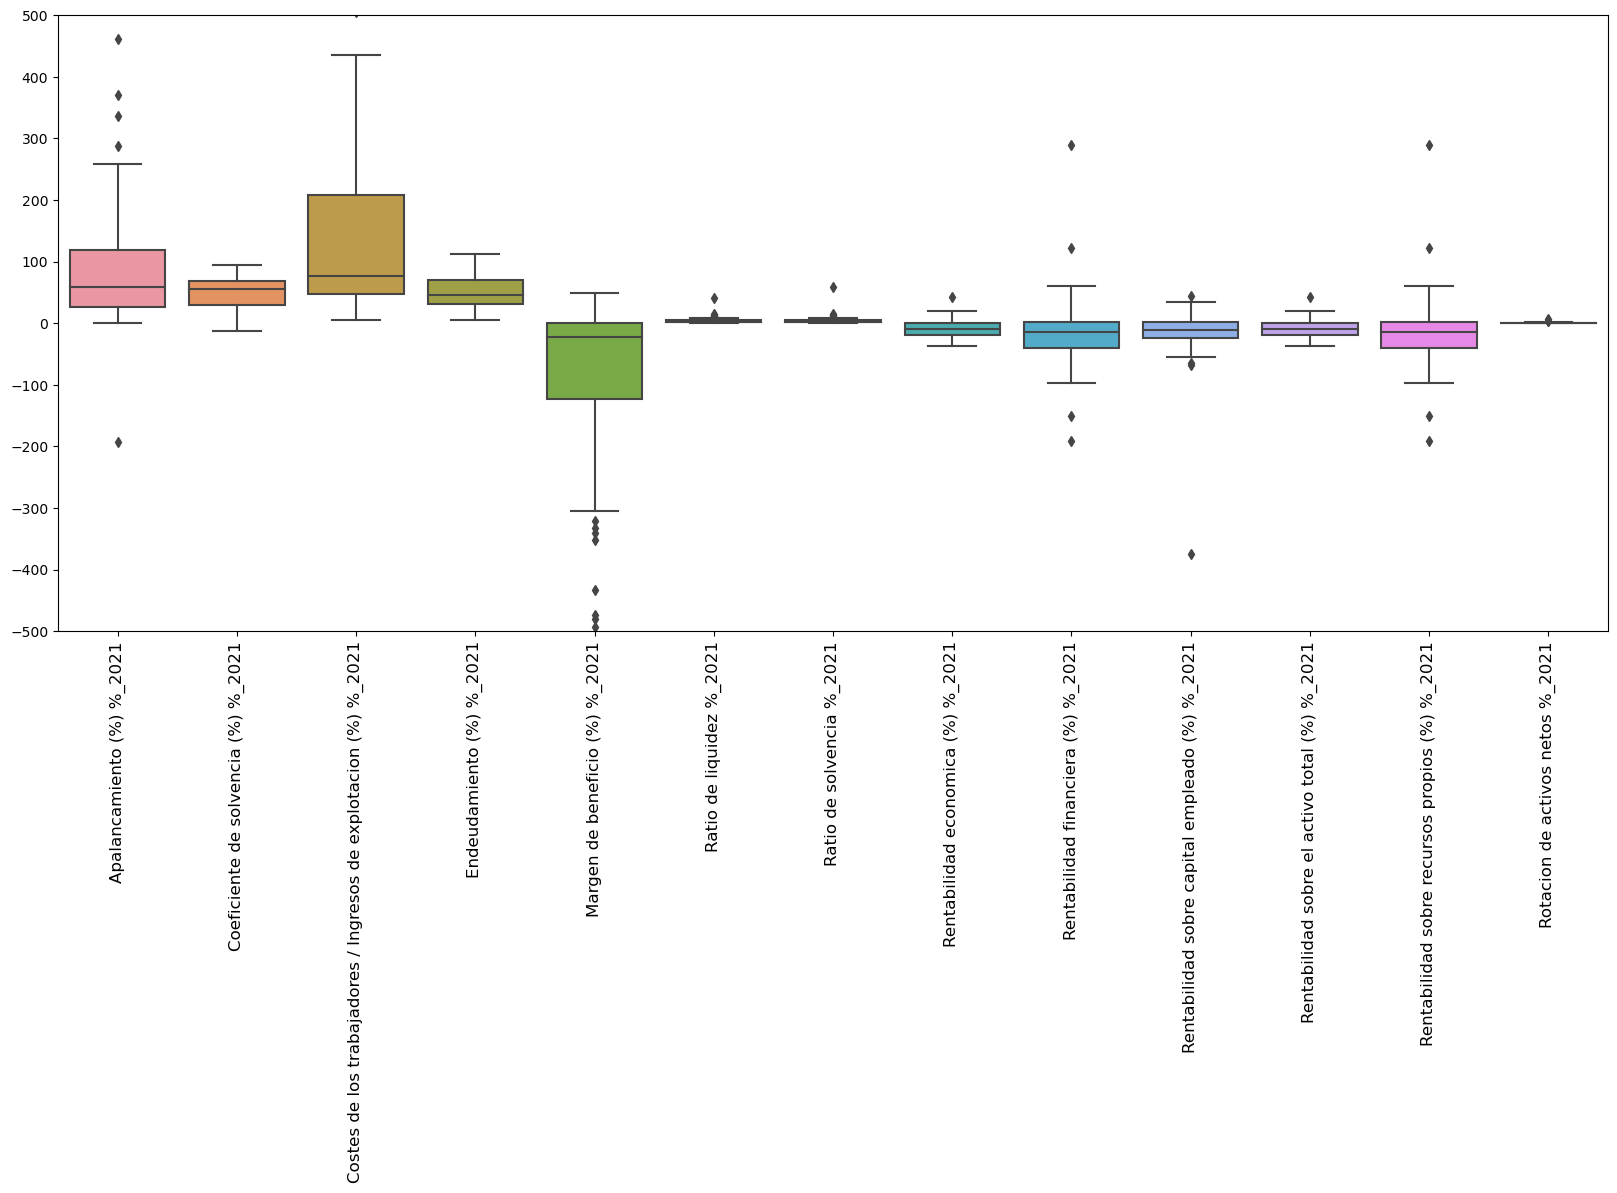

In [100]:
#Se realizan boxplots de las columnas numericas que esten mostradas en %.
df_porcentaje = df_valoracion.loc[:, df_valoracion.columns.str.contains('%_2021')]
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(data=df_porcentaje, ax=ax)
plt.xticks(rotation=90)
ax.set_ylim(-500, 500)
ax.yaxis.set_major_locator(plt.MultipleLocator(100))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
plt.show()

In [101]:
# se saca el codigo_nif de las empresas que tienen mas de 20 missings porque son empresas que no tienen datos para el 2020
# y no se pueden calcular los ratios con ellos

# empresas_missings= df[df['n_missings']>20]['Codigo_NIF'].unique()
# df= df[~df['Codigo_NIF'].isin(empresas_missings)]
# print(df.shape)

Seleccion de variables para el modelo de valoracion.

In [102]:
#Calculamos la correlación de la columna 'valuation_2022' con todas las demás columnas
correlacion = df_valoracion.corr()['valuation_2022']
df_valoracion_correlacion = pd.DataFrame({'Variables': correlacion.index, 'Correlacion con valuation_2022': correlacion.values})
df_valoracion_correlacion = df_valoracion_correlacion.sort_values(by='Correlacion con valuation_2022',ascending=False)
print(df_valoracion_correlacion)

                                           Variables  \
94                                    valuation_2022   
104                                     Precio/Venta   
45                    Activo circulante mil EUR_2021   
58                       Fondos propios mil EUR_2021   
82                         Total activo mil EUR_2021   
..                                               ...   
97                                      revenue_saas   
77   Result. ordinarios antes Impuestos mil EUR_2021   
79              Resultado del Ejercicio mil EUR_2021   
54                                 EBIT mil EUR_2021   
78                Resultado Explotacion mil EUR_2021   

     Correlacion con valuation_2022  
94                         1.000000  
104                        0.664015  
45                         0.606641  
58                         0.580072  
82                         0.579283  
..                              ...  
97                        -0.264880  
77                     

C:\Users\ikerm\AppData\Local\Temp\ipykernel_15512\2778502480.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df_valoracion.corr()['valuation_2022']


In [103]:
#Calculamos la correlación de la columna 'valuation_2022' con todas las demás columnas, pero en valor absoluto.
correlacion = df_valoracion.corr()['valuation_2022']
df_valoracion_correlacion_valor_absoluto = pd.DataFrame({'Variables': correlacion.index, 'Correlacion con valuation_2022': correlacion.abs().values})
df_valoracion_correlacion_valor_absoluto = df_valoracion_correlacion_valor_absoluto.sort_values(by='Correlacion con valuation_2022', ascending=False)
print(df_valoracion_correlacion_valor_absoluto)

                                            Variables  \
94                                     valuation_2022   
104                                      Precio/Venta   
45                     Activo circulante mil EUR_2021   
58                        Fondos propios mil EUR_2021   
82                          Total activo mil EUR_2021   
..                                                ...   
70                           Ratio de liquidez %_2021   
34   Result. ordinarios antes Impuestos mil EUR_ratio   
12                               EBITDA mil EUR_ratio   
98                                    revenue_missing   
96                                                b2c   

     Correlacion con valuation_2022  
94                         1.000000  
104                        0.664015  
45                         0.606641  
58                         0.580072  
82                         0.579283  
..                              ...  
70                         0.008758  
34         

C:\Users\ikerm\AppData\Local\Temp\ipykernel_15512\1597137711.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df_valoracion.corr()['valuation_2022']


In [104]:
# se crea la carpeta de datos limpios
CARPETA_DATOS_LIMPIOS = 'Datos/Limpios/'
if not os.path.exists(CARPETA_DATOS_LIMPIOS):
    os.makedirs(CARPETA_DATOS_LIMPIOS)

# se guarda el df de adquisicion
df_adquisicion_final.to_csv(CARPETA_DATOS_LIMPIOS + 'df_adquisicion_final.csv', index=False)

# se guarda el df de valoracion
df_valoracion.to_csv(CARPETA_DATOS_LIMPIOS + 'df_valoracion.csv', index=False)

# se guarda el df de graficos
df_graficos.to_csv(CARPETA_DATOS_LIMPIOS + 'df_graficos.csv', index=False)

In [105]:
CARPETA_DATOS_ORIGINALES = 'Datos/Limpios/'
df_adquisicion_final= pd.read_csv(os.path.join(CARPETA_DATOS_ORIGINALES, 'df_adquisicion_final.csv'))
df_valoracion= pd.read_csv(os.path.join(CARPETA_DATOS_ORIGINALES, 'df_valoracion.csv'))

**SELECCION DE VARIABLES**

DF_VALORACION

In [106]:
df_valoracion.shape

(60, 109)

In [107]:
df_valoracion.columns

Index(['Codigo_NIF', 'Acreedores a L. P. mil EUR_ratio',
       'Acreedores comerciales mil EUR_ratio',
       'Activo circulante mil EUR_ratio', 'Apalancamiento (%) %_ratio',
       'Capital suscrito mil EUR_ratio', 'Cash flow mil EUR_ratio',
       'Coeficiente de solvencia (%) %_ratio',
       'Coste medio de los empleados mil_ratio',
       'Costes de los trabajadores / Ingresos de explotacion (%) %_ratio',
       ...
       'revenue_saas', 'revenue_missing', 'revenue_manufacturing',
       'revenue_marketplace & ecommerce', 'Sociedad_anonima',
       'Ratio_endeudamiento', 'Margen_bruto(costes trabajadores)',
       'Precio/Venta', 'Precio/Ebitda', 'Precio/Ebit'],
      dtype='object', length=109)

In [108]:
# resumen de las columnas que tienen la palabra ratio
resumen_valoracion= df_valoracion[df_valoracion.columns[df_valoracion.columns.str.contains('ratio')]].describe()
resumen_adquisicion= df_adquisicion_final[df_adquisicion_final.columns[df_adquisicion_final.columns.str.contains('ratio')]].describe()

df_valoracion_ratios= df_valoracion[df_valoracion.columns[df_valoracion.columns.str.contains('ratio')]]
df_adquisicion_ratios= df_adquisicion_final[df_adquisicion_final.columns[df_adquisicion_final.columns.str.contains('ratio')]]

In [109]:
#Se eliminan las variables identificadoras
df_valoracion=df_valoracion.drop(["Codigo_NIF",'Nombre_sabi'],axis=1)

In [110]:
df_valoracion_correlacion_valor_absoluto

,Variables,Correlacion con valuation_2022
94,valuation_2022,1.000000
104,Precio/Venta,0.664015
45,Activo circulante mil EUR_2021,0.606641
58,Fondos propios mil EUR_2021,0.580072
82,Total activo mil EUR_2021,0.579283
...,...,...
70,Ratio de liquidez %_2021,0.008758
34,Result. ordinarios antes Impuestos mil EUR_ratio,0.002301
12,EBITDA mil EUR_ratio,0.002018
98,revenue_missing,0.001825


In [111]:
#Se eliminan las variables que tienen una correlación con 'valuation_2022' menor a 0.3
columnas_a_mantener=list(df_valoracion_correlacion_valor_absoluto[df_valoracion_correlacion_valor_absoluto\
    ['Correlacion con valuation_2022']>0.3]['Variables'].values)
columnas_a_mantener

['valuation_2022',
 'Precio/Venta',
 'Activo circulante mil EUR_2021',
 'Fondos propios mil EUR_2021',
 'Total activo mil EUR_2021',
 'Total pasivo y capital propio mil EUR_2021',
 'Fondo de maniobra mil EUR_2021',
 'Deudores mil EUR_2021',
 'Ingresos de explotacion mil EUR_2021',
 'Importe neto Cifra de Ventas mil EUR_2021',
 'Pasivo liquido mil EUR_2021',
 'Total pasivo_2021',
 'total_funding',
 'Deudas financieras mil EUR_2021',
 'Acreedores comerciales mil EUR_2021',
 'Coste medio de los empleados mil_2021',
 'Pasivo fijo mil EUR_2021',
 'Gastos financieros mil EUR_2021',
 'Resultado Explotacion mil EUR_2021',
 'EBIT mil EUR_2021',
 'Precio/Ebit',
 'Resultado del Ejercicio mil EUR_2021',
 'Result. ordinarios antes Impuestos mil EUR_2021',
 'Acreedores a L. P. mil EUR_2021',
 'Deudas financieras mil EUR_ratio',
 'Importe neto Cifra de Ventas mil EUR_ratio']

In [112]:
df_valoracion_seleccionado=df_valoracion[columnas_a_mantener]

{'Codigo_NIF': 0.08, 'Nombre_sabi': 0.06, 'Anos en Mercado': 0.05, 'Codigo primario CNAE 2009': 0.04, 'Capital social mil EUR': 0.06, 'Porcentaje_adquisicion_cat': 0.0, 'year': 0.09, 'Acreedores a L. P. mil EUR': 0.01, 'Acreedores comerciales mil EUR': 0.01, 'Activo circulante mil EUR': 0.0, 'Apalancamiento (%) %': 0.02, 'Capital suscrito mil EUR': 0.01, 'Cash flow mil EUR': 0.04, 'Deudas financieras mil EUR': 0.02, 'EBITDA mil EUR': 0.03, 'Endeudamiento (%) %': 0.04, 'Fondo de maniobra mil EUR': 0.02, 'Fondos propios mil EUR': 0.02, 'Gastos financieros mil EUR': 0.0, 'Importe neto Cifra de Ventas mil EUR': 0.06, 'Ingresos de explotacion mil EUR': 0.02, 'Inmovilizado mil EUR': 0.01, 'Margen de beneficio (%) %': 0.1, 'Numero empleados': 0.0, 'Pasivo fijo mil EUR': 0.21}


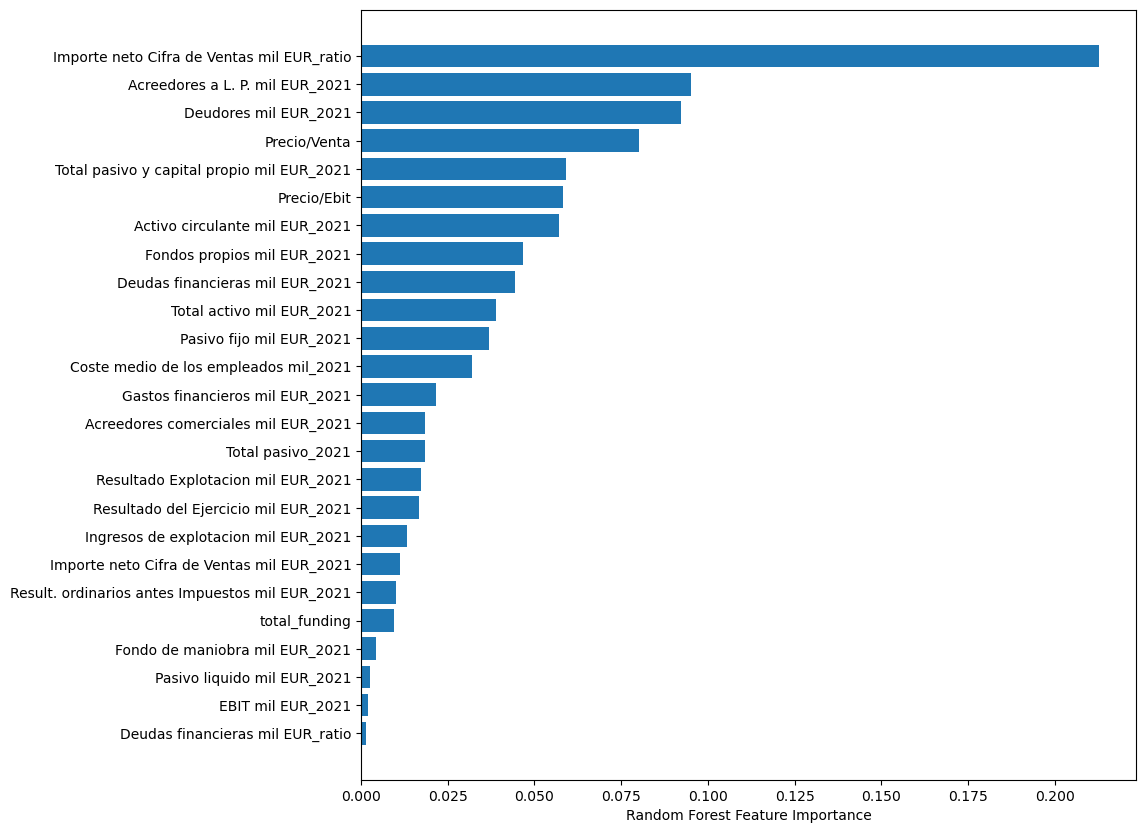

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x = df_valoracion_seleccionado.iloc[:,1:]
y= df_valoracion_seleccionado['valuation_2022']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


rf = RandomForestRegressor (random_state=0)
rf.fit(x_train, y_train)

print(dict(zip(df.columns, rf.feature_importances_.round(2))))

#Plot de las variables en orden descendente
forest_importances = pd.Series(rf.feature_importances_, index=df_valoracion_seleccionado.drop('valuation_2022', axis=1).columns).sort_values(ascending=True)
plt.figure(figsize=(10,10))
plt.barh(forest_importances.index, forest_importances)
plt.xlabel("Random Forest Feature Importance")

#Crear dataframe con importancia de caracteristicas forest_importances=forest_importances.to_frame().reset_index()
forest_importances=forest_importances.to_frame().reset_index()
columns=['feature', 'importance']
forest_importances.columns=['feature', 'importance']
zero_features = list(forest_importances [forest_importances ['importance'] < 0.00025]['feature'])

In [114]:
#cambio las terminaciones de las columnas, quitando _2021 y _ratio para tener en cuenta cuales fueron imputadas previamente 
forest_importances['feature'] = forest_importances['feature'].str.replace('_2021', '')
forest_importances['feature'] = forest_importances['feature'].str.replace('_ratio', '')
forest_importances['feature']

0                     Deudas financieras mil EUR
1                                   EBIT mil EUR
2                         Pasivo liquido mil EUR
3                      Fondo de maniobra mil EUR
4                                  total_funding
5     Result. ordinarios antes Impuestos mil EUR
6           Importe neto Cifra de Ventas mil EUR
7                Ingresos de explotacion mil EUR
8                Resultado del Ejercicio mil EUR
9                  Resultado Explotacion mil EUR
10                                  Total pasivo
11                Acreedores comerciales mil EUR
12                    Gastos financieros mil EUR
13              Coste medio de los empleados mil
14                           Pasivo fijo mil EUR
15                          Total activo mil EUR
16                    Deudas financieras mil EUR
17                        Fondos propios mil EUR
18                     Activo circulante mil EUR
19                                   Precio/Ebit
20         Total pas

In [115]:
#vemos las columnas que estan en forest_importances['feature'] y en x
for i in forest_importances['feature']:
    if i in variables_con_missings_antes_nif.index:
        print(i)

Deudas financieras mil EUR
EBIT mil EUR
Fondo de maniobra mil EUR
total_funding
Result. ordinarios antes Impuestos mil EUR
Importe neto Cifra de Ventas mil EUR
Ingresos de explotacion mil EUR
Resultado del Ejercicio mil EUR
Resultado Explotacion mil EUR
Acreedores comerciales mil EUR
Gastos financieros mil EUR
Coste medio de los empleados mil
Total activo mil EUR
Deudas financieras mil EUR
Fondos propios mil EUR
Activo circulante mil EUR
Total pasivo y capital propio mil EUR
Deudores mil EUR
Acreedores a L. P. mil EUR
Importe neto Cifra de Ventas mil EUR


In [116]:
#se pasa variables_con_missings_antes_nif a un df
variables_con_missings_antes_nif=variables_con_missings_antes_nif.to_frame().reset_index()

In [117]:
#se cambia el nombre index a feature
variables_con_missings_antes_nif.columns=['feature', 'index']
#merge forest_importances con variables_con_missings_antes_nif por la columna feature
variables_con_missings_antes_nif= variables_con_missings_antes_nif.merge(forest_importances, on='feature', how='left')

In [118]:
#se seleccionan las columnas importance que no son NaN
variables_con_missings_antes_nif=variables_con_missings_antes_nif[variables_con_missings_antes_nif['importance'].notna()]
variables_con_missings_antes_nif=variables_con_missings_antes_nif.sort_values(by='importance', ascending=False)

In [119]:
variables_con_missings_antes_nif

,feature,index,importance
13,Importe neto Cifra de Ventas mil EUR,69,0.212827
6,Acreedores a L. P. mil EUR,212,0.095222
21,Deudores mil EUR,20,0.092265
39,Total pasivo y capital propio mil EUR,8,0.058962
36,Activo circulante mil EUR,8,0.057111
42,Fondos propios mil EUR,8,0.046576
3,Deudas financieras mil EUR,400,0.044392
43,Total activo mil EUR,8,0.038801
10,Coste medio de los empleados mil,89,0.031849
49,Gastos financieros mil EUR,8,0.021459


In [120]:
#se eliminan las filas(en el df_valoracion_seleccionado columnas) con mas de 200 missings(index)
variables_con_missings_antes_nif=variables_con_missings_antes_nif[variables_con_missings_antes_nif['index']<200]
#se eliminan los 5 valores mas pequeños de importance
variables_con_missings_antes_nif.iloc[:-5,:]

,feature,index,importance
13,Importe neto Cifra de Ventas mil EUR,69,0.212827
21,Deudores mil EUR,20,0.092265
39,Total pasivo y capital propio mil EUR,8,0.058962
36,Activo circulante mil EUR,8,0.057111
42,Fondos propios mil EUR,8,0.046576
43,Total activo mil EUR,8,0.038801
10,Coste medio de los empleados mil,89,0.031849
49,Gastos financieros mil EUR,8,0.021459
28,Resultado Explotacion mil EUR,9,0.017144
27,Resultado del Ejercicio mil EUR,9,0.016723


In [121]:
df_valoracion_seleccionado_final=df_valoracion_seleccionado[['valuation_2022','Importe neto Cifra de Ventas mil EUR_ratio','Deudores mil EUR_2021','Total pasivo y capital propio mil EUR_2021','Activo circulante mil EUR_2021','Fondos propios mil EUR_2021','Total activo mil EUR_2021','Coste medio de los empleados mil_2021','Gastos financieros mil EUR_2021','Resultado Explotacion mil EUR_2021','Resultado del Ejercicio mil EUR_2021','Ingresos de explotacion mil EUR_2021']]

In [122]:
CARPETA_DATOS_LIMPIOS = 'Datos/Limpios/'

In [123]:
df_valoracion = df_valoracion_seleccionado_final
df_valoracion.to_csv(CARPETA_DATOS_LIMPIOS + 'DF_VALORACION.csv', index=False)

In [124]:
DF_VALORACION= pd.read_csv(os.path.join(CARPETA_DATOS_ORIGINALES, 'DF_VALORACION.csv'))

In [125]:
DF_VALORACION

,valuation_2022,Importe neto Cifra de Ventas mil EUR_ratio,Deudores mil EUR_2021,Total pasivo y capital propio mil EUR_2021,Activo circulante mil EUR_2021,Fondos propios mil EUR_2021,Total activo mil EUR_2021,Coste medio de los empleados mil_2021,Gastos financieros mil EUR_2021,Resultado Explotacion mil EUR_2021,Resultado del Ejercicio mil EUR_2021,Ingresos de explotacion mil EUR_2021
0,1.56,2.151838,275.074260,2530.72564,490.28324,691.370450,2530.72564,43.321212,65.054590,84.24150,16.015460,1044.885460
1,7.08,3.431432,1338.591270,3199.56778,1479.62916,819.456120,3199.56778,31.753147,20.723440,206.35675,458.965320,1311.048599
2,3.77,5.189590,27.590700,793.27522,441.91773,246.026530,793.27522,45.454323,5.316800,15.83807,8.417020,494.230710
3,1.29,1.000000,51.908710,344.22697,138.02002,221.122030,344.22697,22.073972,2.620620,-127.36227,-103.986310,27.039110
4,0.37,1.846604,5.866660,229.70534,195.86569,91.450250,229.70534,9.095735,1.082640,-4.98759,-6.070230,114.501870
5,1.01,1.000000,120.498210,898.73719,701.75400,347.451100,898.73719,31.861058,5.401820,-1.89652,-5.838670,129.378430
6,6.07,3.762845,9.935930,1520.14235,392.91185,853.513630,1520.14235,40.238630,13.850660,-289.70151,-230.841740,16.277310
7,13.16,3.285474,2692.391710,13940.42313,7457.06106,12295.483090,13940.42313,36.196320,6.987940,-660.05507,-336.612040,1632.497150
8,12.70,1.377859,827.680730,1625.67506,1125.24484,1035.471780,1625.67506,44.241284,6.008790,-108.50260,-79.348800,696.401690
9,1.56,1.301199,486.374640,1479.36282,667.40856,429.158690,1479.36282,29.906777,18.159489,222.83824,260.710190,1068.066280


DF_ADQUISICION

In [126]:
#Calculamos la correlación de la columna 'valuation_2022' con todas las demás columnas, pero en valor absoluto.
correlacion = df_adquisicion_final.corr()['Porcentaje_adquisicion_cat']
df_adquisicion_final_valor_absoluto = pd.DataFrame({'Variables': correlacion.index, 'Correlacion con Porcentaje_adquisicion_cat': correlacion.abs().values})
df_adquisicion_final_valor_absoluto = df_adquisicion_final_valor_absoluto.sort_values(by='Correlacion con Porcentaje_adquisicion_cat', ascending=False)
print(df_adquisicion_final_valor_absoluto)

                                    Variables  \
89                 Porcentaje_adquisicion_cat   
94                               growth_stage   
86                            Anos en Mercado   
48                     Cash flow mil EUR_2021   
55                        EBITDA mil EUR_2021   
..                                        ...   
103         Margen_bruto(costes trabajadores)   
98                            revenue_missing   
19   Impuestos sobre sociedades mil EUR_ratio   
100           revenue_marketplace & ecommerce   
90                                       year   

     Correlacion con Porcentaje_adquisicion_cat  
89                                     1.000000  
94                                     0.233508  
86                                     0.175090  
48                                     0.157354  
55                                     0.151855  
..                                          ...  
103                                    0.001956  
98         

C:\Users\ikerm\AppData\Local\Temp\ipykernel_15512\2904441121.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df_adquisicion_final.corr()['Porcentaje_adquisicion_cat']


In [127]:
x=df_adquisicion_final_valor_absoluto
x

,Variables,Correlacion con Porcentaje_adquisicion_cat
89,Porcentaje_adquisicion_cat,1.000000
94,growth_stage,0.233508
86,Anos en Mercado,0.175090
48,Cash flow mil EUR_2021,0.157354
55,EBITDA mil EUR_2021,0.151855
...,...,...
103,Margen_bruto(costes trabajadores),0.001956
98,revenue_missing,0.001658
19,Impuestos sobre sociedades mil EUR_ratio,0.000421
100,revenue_marketplace & ecommerce,0.000083


In [128]:
#Se eliminan las variables que tienen una correlación con 'valuation_2022' menor a 0.3
columnas_a_mantener=list(df_adquisicion_final_valor_absoluto[df_adquisicion_final_valor_absoluto\
    ['Correlacion con Porcentaje_adquisicion_cat']>0.1]['Variables'].values)
columnas_a_mantener

['Porcentaje_adquisicion_cat',
 'growth_stage',
 'Anos en Mercado',
 'Cash flow mil EUR_2021',
 'EBITDA mil EUR_2021',
 'Inmovilizado mil EUR_2021',
 'Fondos propios mil EUR_2021',
 'Numero empleados_2021',
 'Valor agregado mil EUR_2021',
 'Total pasivo_ratio',
 'Inmovilizado mil EUR_ratio',
 'Capital social mil EUR',
 'Capital suscrito mil EUR_2021',
 'Gastos financieros mil EUR_ratio',
 'Coste medio de los empleados mil_2021',
 'Gastos de personal mil EUR_2021',
 'Resultado financiero mil EUR_ratio',
 'revenue_manufacturing',
 'Total pasivo y capital propio mil EUR_2021',
 'Total activo mil EUR_2021',
 'Gastos financieros mil EUR_2021',
 'Pasivo fijo mil EUR_2021',
 'total_funding']

In [129]:
df_adquisicion_seleccionado=df_adquisicion_final[columnas_a_mantener]
df_adquisicion_seleccionado.columns

Index(['Porcentaje_adquisicion_cat', 'growth_stage', 'Anos en Mercado',
       'Cash flow mil EUR_2021', 'EBITDA mil EUR_2021',
       'Inmovilizado mil EUR_2021', 'Fondos propios mil EUR_2021',
       'Numero empleados_2021', 'Valor agregado mil EUR_2021',
       'Total pasivo_ratio', 'Inmovilizado mil EUR_ratio',
       'Capital social mil EUR', 'Capital suscrito mil EUR_2021',
       'Gastos financieros mil EUR_ratio',
       'Coste medio de los empleados mil_2021',
       'Gastos de personal mil EUR_2021', 'Resultado financiero mil EUR_ratio',
       'revenue_manufacturing', 'Total pasivo y capital propio mil EUR_2021',
       'Total activo mil EUR_2021', 'Gastos financieros mil EUR_2021',
       'Pasivo fijo mil EUR_2021', 'total_funding'],
      dtype='object')

{'Codigo_NIF': 0.01, 'Nombre_sabi': 0.03, 'Anos en Mercado': 0.06, 'Codigo primario CNAE 2009': 0.06, 'Capital social mil EUR': 0.05, 'Porcentaje_adquisicion_cat': 0.05, 'year': 0.02, 'Acreedores a L. P. mil EUR': 0.08, 'Acreedores comerciales mil EUR': 0.06, 'Activo circulante mil EUR': 0.05, 'Apalancamiento (%) %': 0.06, 'Capital suscrito mil EUR': 0.08, 'Cash flow mil EUR': 0.04, 'Deudas financieras mil EUR': 0.05, 'EBITDA mil EUR': 0.05, 'Endeudamiento (%) %': 0.04, 'Fondo de maniobra mil EUR': 0.0, 'Fondos propios mil EUR': 0.06, 'Gastos financieros mil EUR': 0.05, 'Importe neto Cifra de Ventas mil EUR': 0.04, 'Ingresos de explotacion mil EUR': 0.03, 'Inmovilizado mil EUR': 0.04}


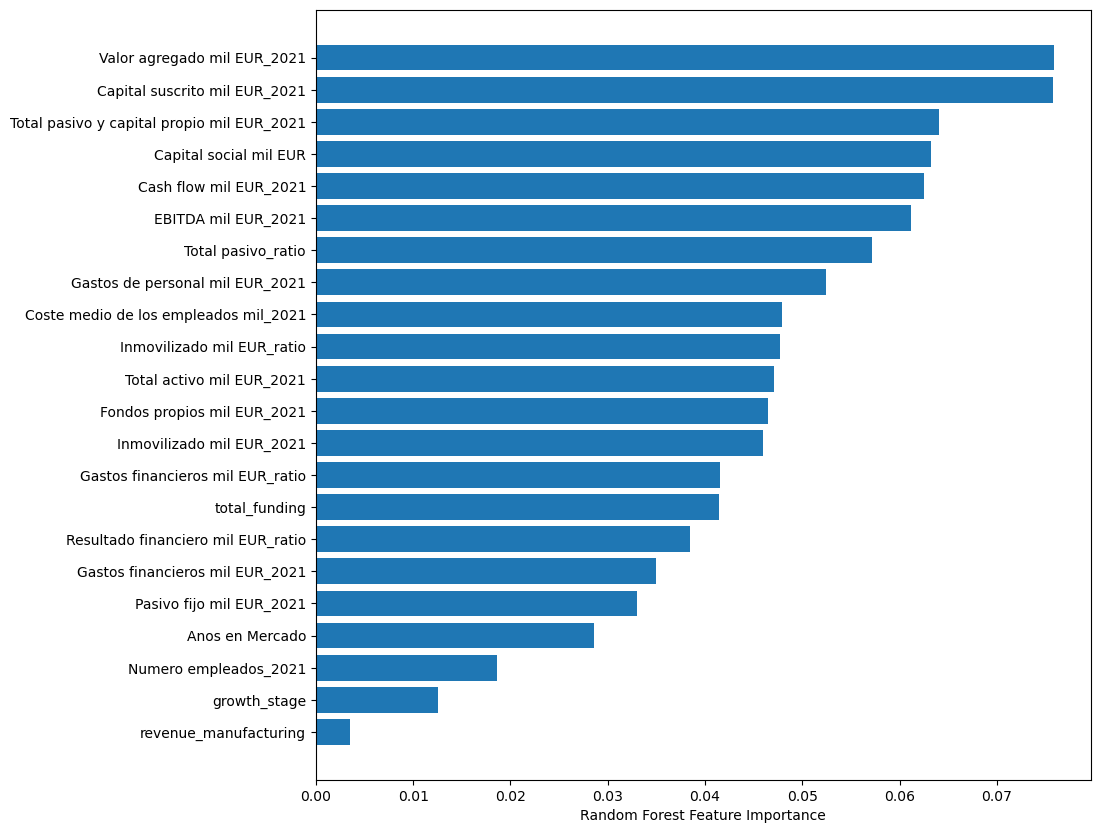

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x = df_adquisicion_seleccionado.iloc[:,1:]
y= df_adquisicion_seleccionado['Porcentaje_adquisicion_cat']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


rf = RandomForestRegressor (random_state=0)
rf.fit(x_train, y_train)

print(dict(zip(df.columns, rf.feature_importances_.round(2))))

#Plot de las variables en orden descendente
forest_importances = pd.Series(rf.feature_importances_, index=df_adquisicion_seleccionado.drop('Porcentaje_adquisicion_cat', axis=1).columns).sort_values(ascending=True)
plt.figure(figsize=(10,10))
plt.barh(forest_importances.index, forest_importances)
plt.xlabel("Random Forest Feature Importance")

#Crear dataframe con importancia de caracteristicas forest_importances=forest_importances.to_frame().reset_index()
forest_importances=forest_importances.to_frame().reset_index()
columns=['feature', 'importance']
forest_importances.columns=['feature', 'importance']
zero_features = list(forest_importances [forest_importances ['importance'] < 0.00025]['feature'])

In [131]:
#cambio las terminaciones de las columnas, quitando _2021 y _ratio para tener en cuenta cuales fueron imputadas previamente 
forest_importances['feature'] = forest_importances['feature'].str.replace('_2021', '')
forest_importances['feature'] = forest_importances['feature'].str.replace('_ratio', '')
forest_importances['feature']

0                     revenue_manufacturing
1                              growth_stage
2                          Numero empleados
3                           Anos en Mercado
4                       Pasivo fijo mil EUR
5                Gastos financieros mil EUR
6              Resultado financiero mil EUR
7                             total_funding
8                Gastos financieros mil EUR
9                      Inmovilizado mil EUR
10                   Fondos propios mil EUR
11                     Total activo mil EUR
12                     Inmovilizado mil EUR
13         Coste medio de los empleados mil
14               Gastos de personal mil EUR
15                             Total pasivo
16                           EBITDA mil EUR
17                        Cash flow mil EUR
18                   Capital social mil EUR
19    Total pasivo y capital propio mil EUR
20                 Capital suscrito mil EUR
21                   Valor agregado mil EUR
Name: feature, dtype: object

In [132]:
variables_con_missings_antes_nif_copy.index

Index(['valuation_2022', 'ratio_last_funding', 'Deudas financieras mil EUR',
       'last_funding', 'Acreedores comerciales mil EUR',
       'Acreedores a L. P. mil EUR', 'last_round', 'ownerships',
       'Margen_bruto(costes trabajadores)', 'Coste medio de los empleados mil',
       'Numero empleados', 'Importe neto Cifra de Ventas mil EUR',
       'total_funding', 'Gastos de personal mil EUR',
       'Ingresos de explotacion mil EUR', 'Margen de beneficio (%) %',
       'Periodo de cobro (dias) dias',
       'Costes de los trabajadores / Ingresos de explotacion (%) %',
       'Tesoreria mil EUR', 'Deudores mil EUR', 'Fondo de maniobra mil EUR',
       'EBITDA mil EUR', 'Impuestos sobre sociedades mil EUR', 'EBIT mil EUR',
       'Valor agregado mil EUR', 'Resultado del Ejercicio mil EUR',
       'Resultado Explotacion mil EUR',
       'Result. ordinarios antes Impuestos mil EUR', 'Ratio de solvencia %',
       'Ratio de liquidez %', 'Cash flow mil EUR',
       'Rentabilidad sobre el

In [133]:
#vemos las columnas que estan en forest_importances['feature'] y en x
for i in forest_importances['feature']:
    if i in variables_con_missings_antes_nif_copy.index:
        print(i)

growth_stage
Numero empleados
Gastos financieros mil EUR
Resultado financiero mil EUR
total_funding
Gastos financieros mil EUR
Inmovilizado mil EUR
Fondos propios mil EUR
Total activo mil EUR
Inmovilizado mil EUR
Coste medio de los empleados mil
Gastos de personal mil EUR
EBITDA mil EUR
Cash flow mil EUR
Total pasivo y capital propio mil EUR
Capital suscrito mil EUR
Valor agregado mil EUR


In [134]:
#se pasa variables_con_missings_antes_nif a un df
variables_con_missings_antes_nif=variables_con_missings_antes_nif_copy.to_frame().reset_index()

In [135]:
variables_con_missings_antes_nif

,index,0
0,valuation_2022,704
1,ratio_last_funding,432
2,Deudas financieras mil EUR,400
3,last_funding,336
4,Acreedores comerciales mil EUR,259
5,Acreedores a L. P. mil EUR,212
6,last_round,140
7,ownerships,134
8,Margen_bruto(costes trabajadores),99
9,Coste medio de los empleados mil,89


In [136]:
#se cambia el nombre index a feature
variables_con_missings_antes_nif.columns=['feature', 'index']
#merge forest_importances con variables_con_missings_antes_nif por la columna feature
variables_con_missings_antes_nif= variables_con_missings_antes_nif.merge(forest_importances, on='feature', how='left')

In [137]:
variables_con_missings_antes_nif

,feature,index,importance
0,valuation_2022,704,NaN
1,ratio_last_funding,432,NaN
2,Deudas financieras mil EUR,400,NaN
3,last_funding,336,NaN
4,Acreedores comerciales mil EUR,259,NaN
5,Acreedores a L. P. mil EUR,212,NaN
6,last_round,140,NaN
7,ownerships,134,NaN
8,Margen_bruto(costes trabajadores),99,NaN
9,Coste medio de los empleados mil,89,0.047956


In [138]:
#se seleccionan las columnas importance que no son NaN
variables_con_missings_antes_nif=variables_con_missings_antes_nif[variables_con_missings_antes_nif['importance'].notna()]
variables_con_missings_antes_nif=variables_con_missings_antes_nif.sort_values(by='importance', ascending=False)

In [139]:
variables_con_missings_antes_nif

,feature,index,importance
24,Valor agregado mil EUR,9,0.075857
32,Capital suscrito mil EUR,8,0.075742
37,Total pasivo y capital propio mil EUR,8,0.064003
30,Cash flow mil EUR,8,0.062527
21,EBITDA mil EUR,9,0.061128
13,Gastos de personal mil EUR,52,0.052443
9,Coste medio de los empleados mil,89,0.047956
47,Inmovilizado mil EUR,8,0.047727
41,Total activo mil EUR,8,0.047086
40,Fondos propios mil EUR,8,0.046513


In [140]:
#se eliminan los 5 valores mas pequeños de importance
variables_con_missings_antes_nif.iloc[:-5,:]

,feature,index,importance
24,Valor agregado mil EUR,9,0.075857
32,Capital suscrito mil EUR,8,0.075742
37,Total pasivo y capital propio mil EUR,8,0.064003
30,Cash flow mil EUR,8,0.062527
21,EBITDA mil EUR,9,0.061128
13,Gastos de personal mil EUR,52,0.052443
9,Coste medio de los empleados mil,89,0.047956
47,Inmovilizado mil EUR,8,0.047727
41,Total activo mil EUR,8,0.047086
40,Fondos propios mil EUR,8,0.046513


In [141]:
df_adquisicion_seleccionado_final=df_adquisicion_final[['Porcentaje_adquisicion_cat','Valor agregado mil EUR_2021','Capital suscrito mil EUR_2021','Total pasivo y capital propio mil EUR_2021','Cash flow mil EUR_2021','EBITDA mil EUR_2021','Gastos de personal mil EUR_2021','Coste medio de los empleados mil_2021','Inmovilizado mil EUR_ratio','Fondos propios mil EUR_2021','Inmovilizado mil EUR_2021','Gastos financieros mil EUR_2021']]

In [142]:
DF_ADQUISICION=df_adquisicion_seleccionado_final
DF_ADQUISICION.to_csv(CARPETA_DATOS_LIMPIOS + 'DF_ADQUISICION.csv', index=False)

In [143]:
DF_ADQUISICION= pd.read_csv(os.path.join(CARPETA_DATOS_ORIGINALES, 'DF_ADQUISICION.csv'))

In [144]:
DF_ADQUISICION

,Porcentaje_adquisicion_cat,Valor agregado mil EUR_2021,Capital suscrito mil EUR_2021,Total pasivo y capital propio mil EUR_2021,Cash flow mil EUR_2021,EBITDA mil EUR_2021,Gastos de personal mil EUR_2021,Coste medio de los empleados mil_2021,Inmovilizado mil EUR_ratio,Fondos propios mil EUR_2021,Inmovilizado mil EUR_2021,Gastos financieros mil EUR_2021
0,1,6893.593000,745.330,1.950122e+04,3296.408000,3600.559000,3302.980000,47.869275,0.980366,12382.28400,8604.70000,100.03600
1,1,423.950670,291.485,1.793114e+03,-35.104810,54.851080,459.055480,76.509246,0.762976,1242.34124,137.24646,90.16063
2,2,105344.000000,2000.000,1.183593e+06,3589.000000,6182.000000,98266.000000,106.927094,1.431985,146672.00000,150758.00000,3540.00000
3,1,1585.073240,158.970,6.646021e+03,-72.670569,-20.896349,1584.179030,49.505594,1.048763,1048.72675,2983.85415,73.56478
4,2,12660.000000,13301.000,2.374040e+05,3670.000000,9977.000000,7230.000000,118.524590,1.106232,167478.00000,143704.00000,9971.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
407,1,182.098800,4.304,1.577084e+03,-225.585160,-211.888350,393.987150,49.248393,1.224966,650.03895,890.38985,13.69681
408,0,847.360899,90.000,5.943594e+02,-34.360860,-65.311740,912.672120,35.102773,1.218846,-47.56914,395.93428,4.54445
409,2,483.357640,3.050,1.267949e+03,-63.480299,-74.175190,557.532830,61.948092,17.309935,-69.88909,881.85604,2.15165
410,0,-2.287620,100.000,1.168797e+02,-0.620280,-2.287620,347.017536,38.557504,99999.000000,116.87972,82.56774,0.00000
